In [1]:
"""Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload."""

'Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload.'

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(cwd)

# Get the grandparent directory (two levels above)
root_dir = os.path.dirname(parent_dir)

# Add the root directory to sys.path
if root_dir not in sys.path:
    sys.path.append(root_dir)

print(f"Root directory: {root_dir} is added to sys.path")


Root directory: /Users/aag/Documents/proteinfolding is added to sys.path


In [3]:
from proteinfolding import * 

##TODO: proper testing ##

In [4]:
# for training and running trianed cirucits
from proteinfolding.data_processing import *
from proteinfolding.paths import XY_QAOA_DATA_DIR, EXACT_DATA_ENERGY_BITSTRING_FILE, MIN_SHOTS_TO_FIND_GS_FILE
from proteinfolding.simulations_production import statevector_simulation_XY_parallel_trained, statevector_simulation_XY_parallel_new

SIMULATION_ID = "A127566"
PROCESSED_DATA_DIR = os.path.join(XY_QAOA_DATA_DIR, SIMULATION_ID)

/Users/aag/Documents/proteinfolding/notebooks/local_testing
┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2025 [Rosetta PyRosetta4.Release.python310.m1 2025.06+release.029c6a159b896477003a14f78f472d4cd2cead46 2025-02-04T15:14:13] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.pyt

In [36]:
num_rot_arr = [4]
num_res_arr = [3]
shots_arr = [5, 10, 15]
alpha_arr = [0.2]
p_arr = [4]

pos = 0

param_list = []

for num_rot in num_rot_arr:
    for num_res in num_res_arr:
        for shots in shots_arr:
            for alpha in alpha_arr:
                for p in p_arr:
                    param_list.append((num_rot, num_res, shots, alpha, p))
                    statevector_simulation_XY_parallel_new(num_rot=num_rot, num_res=num_res, shots=shots, alpha=alpha, p=p, pos=pos)

Python script started!
files already present, not generating
Running main function...


Traceback (most recent call last):
  File "/Users/aag/Documents/proteinfolding/pf_venv/lib/python3.10/site-packages/scipy/optimize/_cobyla_py.py", line 281, in calcfc
capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
    f = sf.fun(x)
  File "/Users/aag/Documents/proteinfolding/pf_venv/lib/python3.10/site-packages/scipy/optimize/_differentiable_functions.py", line 278, in fun
    self._update_fun()
  File "/Users/aag/Documents/proteinfolding/pf_venv/lib/python3.10/site-packages/scipy/optimize/_differentiable_functions.py", line 262, in _update_fun
    self._update_fun_impl()
  File "/Users/aag/Documents/proteinfolding/pf_venv/lib/python3.10/site-packages/scipy/optimize/_differentiable_functions.py", line 163, in update_fun
    self.f = fun_wrapped(self.x)
  File "/Users/aag/Documents/proteinfolding/pf_venv/lib/python3.10/

: 

In [43]:
# convert to dataframe
from proteinfolding.data_processing import clean_json_data, load_json_files, clean_intermediate_data

CWD = os.getcwd()
data_dir = os.path.join(CWD, 'qaoa_local')
print(data_dir)
data = load_json_files(data_dir)

clean_data = clean_json_data(data)

df = clean_intermediate_data(clean_data)

df_exact = pd.read_csv(EXACT_DATA_ENERGY_BITSTRING_FILE, compression="gzip")

/Users/aag/Documents/proteinfolding/notebooks/local_testing/qaoa_local


In [26]:
import pandas as pd
from proteinfolding.paths import XY_QAOA_DATA_DIR, EXACT_DATA_ENERGY_BITSTRING_FILE, MIN_SHOTS_TO_FIND_GS_FILE
# for training
df = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, f"{SIMULATION_ID}.csv.gz"), compression="gzip")   
# df_min_shots = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, MIN_SHOTS_TO_FIND_GS_FILE))

# df_min_shots = pd.read_csv('df_min_shots_trained.csv')
df_exact = pd.read_csv(EXACT_DATA_ENERGY_BITSTRING_FILE, compression="gzip")

In [27]:
df.head()

num_res  num_rot  alpha  shots  p  pos  transverse_field  \
0        4        5    0.2     45  4    0                 1   
1        4        5    0.2     30  4    0                 1   
2        5        5    0.2     45  4    0                 1   
3        4        4    0.2     35  4    0                 1   
4        5        3    0.2     40  4    0                 1   

                                          bitstrings     energy  \
0  ['10000001000000100010', '10000010000000100010... -35.788970   
1  ['10000001000000100010', '10000010000000100010... -35.788970   
2  ['0100000100000010010000010', '000010010000001... -56.036883   
3  ['1000001010000001', '1000010010000001', '1000... -21.897148   
4  ['010010100001001', '010010100001100', '010010... -25.632220   

                                   intermediate_data  \
0  [{'34884': 0.022222222222222223, '35080': 0.02...   
1  [{'34888': 0.03333333333333333, '35330': 0.033...   
2  [{'1083460': 0.022222222222222223, '1116417': ...   
3  [{'4417': 0.02857142857142857, '4420': 0.02857...   
4  [{'4684': 0.025, '4772': 0.025, '4874': 0.025,...   

                                          parameters  \
0  [[[-0.1, -1.0, -0.03333333333333334, -0.333333...   
1  [[[-0.1, -1.0, -0.03333333333333334, -0.333333...   
2  [[[-0.1, -1.0, -0.03333333333333334, -0.333333...   
3  [[[-0.1, -1.0, -0.03333333333333334, -0.333333...   
4  [[[-0.1, -1.0, -0.03333333333333334, -0.333333...   

                                      all_bitstrings  \
0  {'00001000010000110000': {'probability': 0.177...   
1  {'00001000010000100010': {'probability': 0.066...   
2  {'0000100010000010001000100': {'probability': ...   
3  {'0001001000100010': {'probability': 0.6857142...   
4  {'001001010001001': {'probability': 0.24999999...   

                         all_unrestricted_bitstrings  \
0  {'00001000010000110000': {'probability': 0.177...   
1  {'00001000010000100010': {'probability': 0.066...   
2  {'0000100010000010001000100': {'probability': ...   
3  {'0001001000100010': {'probability': 0.6857142...   
4  {'001001010001001': {'probability': 0.24999999...   

                                   sorted_bitstrings  \
0  [['10000001000000100010', {'probability': 0.28...   
1  [['10000001000000100010', {'probability': 0.6,...   
2  [['0100000100000010010000010', {'probability':...   
3  [['1000001010000001', {'probability': 0.114285...   
4  [['010010100001001', {'probability': 3.9749999...   

                      sorted_unrestricted_bitstrings  
0  [['10000001000000100010', {'probability': 0.28...  
1  [['10000001000000100010', {'probability': 0.6,...  
2  [['0100000100000010010000010', {'probability':...  
3  [['1000001010000001', {'probability': 0.114285...  
4  [['010010100001001', {'probability': 3.9749999...

In [28]:
df = df[df['shots'] < 1000] 

In [29]:
df_exact.head()

num_res  num_rot                                           energies  \
0        2        2  [(0.22744239866733562+0j), (0.0660957843065260...   
1        2        3  [(-1.8422357141971588+0j), (-2.003582328557968...   
2        3        2  [(-1.5153165645897388+0j), (-0.441403400152921...   
3        3        3  [(-4.412406247109175+0j), (-3.3384930826723576...   
4        4        2  [(2.9962810706347227+0j), (3.221675081178546+0...   

                                          bitstrings  
0                   ['1010', '1001', '0110', '0101']  
1  ['100100', '100010', '100001', '010100', '0100...  
2  ['101010', '101001', '100110', '100101', '0110...  
3  ['100100100', '100100010', '100100001', '10001...  
4  ['10101010', '10101001', '10100110', '10100101...

In [30]:
pos = 0

df_pos = df[df['pos'] == pos]

df_pos = df_pos.drop(columns=['pos'])

In [31]:
from proteinfolding.data_processing import compute_mean_shots_to_ground_state

df_shots = compute_mean_shots_to_ground_state(df, df_exact)

In [32]:
print(df_shots)

    num_res  num_rot  alpha  p  shots  mean_iter  mean_shots
26        4        2    0.2  4     15        1.0        15.0
28        4        2    0.2  4     20        1.0        20.0
29        4        2    0.2  4     25        1.0        25.0
23        4        2    0.2  4     30        1.0        30.0
24        4        2    0.2  4     35        1.0        35.0
25        4        2    0.2  4     40        1.0        40.0
22        4        2    0.2  4     45        1.0        45.0
27        4        2    0.2  4     50        1.0        50.0
18        4        3    0.2  4     15       60.0       900.0
20        4        3    0.2  4     20       10.0       200.0
21        4        3    0.2  4     25        3.0        75.0
15        4        3    0.2  4     30        3.0        90.0
16        4        3    0.2  4     35        3.0       105.0
17        4        3    0.2  4     40        7.0       280.0
14        4        3    0.2  4     45       16.0       720.0
19        4        3    

In [33]:
df_shots['num_qubits'] = df_shots['num_rot'] * df_shots['num_res']
df_shots.to_csv("df_mean_shots.csv", mode='a', index=False, header=False)

In [25]:
df_shots = pd.read_csv("df_mean_shots.csv")
print(df_shots.shape)

(1278, 8)


In [26]:
df_qpu_mean = df_shots.loc[:, ['num_res', 'num_rot', 'num_qubits', 'shots', 'p', 'mean_iter']].copy()
df_qpu_mean['qpu_calls'] = df_qpu_mean['mean_iter'] * df_qpu_mean['shots'] 

print(df_qpu_mean)

      num_res  num_rot  num_qubits  shots  p  mean_iter  qpu_calls
0           6        3          18     15  4       21.0      315.0
1           6        3          18     20  4       14.0      280.0
2           6        3          18     30  4       13.0      390.0
3           6        3          18     40  4       15.0      600.0
4           6        3          18     45  4       23.0     1035.0
...       ...      ...         ...    ... ..        ...        ...
1273        5        5          25     25  4       62.0     1550.0
1274        5        5          25     30  4       18.0      540.0
1275        5        5          25     35  4       33.0     1155.0
1276        5        5          25     40  4       38.0     1520.0
1277        5        5          25     45  4       34.0     1530.0

[1278 rows x 7 columns]


# Plot

In [27]:
df_qpu_mean["qpu_calls"] = pd.to_numeric(df_qpu_mean["qpu_calls"], errors="coerce")
df_qpu_mean["num_res"] = pd.to_numeric(df_qpu_mean["num_res"], errors="coerce")
df_qpu_mean["num_rot"] = pd.to_numeric(df_qpu_mean["num_rot"], errors="coerce")

df_qpu_mean["num_qubits"] = df_qpu_mean["num_res"] * df_qpu_mean["num_rot"]

n_sv_per_group = df_qpu_mean.groupby("num_qubits").size().reset_index(name="n_runs")

qpu_stats = df_qpu_mean.groupby(["num_res", "num_rot"]).agg(
    qpu_calls_mean=("qpu_calls", "mean"),
    std_qpu_calls=("qpu_calls", "std")
).reset_index()

qpu_stats["num_qubits"] = qpu_stats["num_res"] * qpu_stats["num_rot"]

qpu_stats["num_qubits"] = pd.to_numeric(qpu_stats["num_qubits"], errors="coerce").astype(int)
n_sv_per_group["num_qubits"] = pd.to_numeric(n_sv_per_group["num_qubits"], errors="coerce").astype(int)

qpu_stats = qpu_stats.merge(n_sv_per_group, on="num_qubits", how="left")

qpu_stats = qpu_stats[["num_res", "num_rot", "qpu_calls_mean", "std_qpu_calls", "num_qubits", "n_runs"]]

qpu_stats

num_res  num_rot  qpu_calls_mean  std_qpu_calls  num_qubits  n_runs
0         2        2      158.837209     192.136600           4      43
1         2        3      235.755814     315.758033           6      86
2         2        4       25.000000      13.228757           8      54
3         2        5       80.000000      26.457513          10      45
4         3        2      172.790698     190.957183           6      86
5         3        3      101.326531     145.088937           9      98
6         3        4       59.444444      46.566451          12     213
7         3        5      386.216216     382.060215          15     106
8         4        2      140.294118     181.654650           8      54
9         4        3      224.236641     257.834527          12     213
10        4        4      345.073529     253.108278          16      91
11        4        5      453.396226     405.161143          20      88
12        5        2      217.142857     223.868817          10      45
13        5        3      401.594203     390.314252          15     106
14        5        4      485.428571     323.626899          20      88
15        5        5      777.857143     517.511480          25      14
16        6        2      597.837838     793.813353          12     213
17        6        3      733.894737     924.891074          18     113
18        6        4     1168.823529    1009.171734          24      58
19        7        2      157.862595     165.624727          14     131
20        7        3      878.100775    1814.190935          21     129
21        7        4      640.000000     622.253967          28       2
22        8        2     1444.782609    1583.272990          16      91
23        8        3     2328.571429    4706.985690          24      58
24        9        2     3301.666667    4623.309548          18     113
25        9        3     5135.000000    3878.024626          27       7

In [28]:
# Filter for num_res == 6
df_qpu_mean = df_qpu_mean[df_qpu_mean["num_res"] == 6]

# Save to CSV
df_qpu_mean.to_csv("qpu_stats_res6.csv", index=False)


In [29]:
# Group by num_qubits and num_rot (no filtering by p)
qpu_stats = df_qpu_mean.groupby(["num_qubits", "num_rot"]).agg(
    qpu_calls_mean=("qpu_calls", "mean"),
    std_qpu_calls=("qpu_calls", "std"),
    n_runs=("qpu_calls", "count")
).reset_index()

# Reorder columns
qpu_stats = qpu_stats[["num_qubits", "num_rot", "qpu_calls_mean", "std_qpu_calls", "n_runs"]]

# Save to CSV
qpu_stats.to_csv("QPU_calls_stats_all_p.csv", mode='w', index=False, header=True)


In [37]:
qpu_stats.to_csv("QPU_calls_stats_real.csv", mode='w', index=False, header=True)

In [ ]:
# Filter for p=4
df_p4 = df_qpu_mean[df_qpu_mean["p"] == 4]

# Group by num_qubits and num_rot
qpu_stats = df_p4.groupby(["num_qubits", "num_rot"]).agg(
    qpu_calls_mean=("qpu_calls", "mean"),
    std_qpu_calls=("qpu_calls", "std"),
    n_runs=("qpu_calls", "count")
).reset_index()

# Reorder columns
qpu_stats = qpu_stats[["num_qubits", "num_rot", "qpu_calls_mean", "std_qpu_calls", "n_runs"]]

# Save to CSV
qpu_stats.to_csv("QPU_calls_stats_p4_real.csv", mode='w', index=False, header=True)

SA LOOCV Slope: 0.078 ± 0.002
SA Exp Fit: A = 4.08e+06, B = 0.077 ± 0.004, R² = 0.6679
SV QAOA LOOCV Slope: 0.049 ± 0.042
SV QAOA Exp Fit: A = 2.57e+02, B = 0.041 ± 0.059, R² = -0.0773
MPS QAOA LOOCV Slope: 0.070 ± 0.011
MPS QAOA Exp Fit: A = 5.34e+03, B = 0.066 ± 0.013, R² = 0.8203


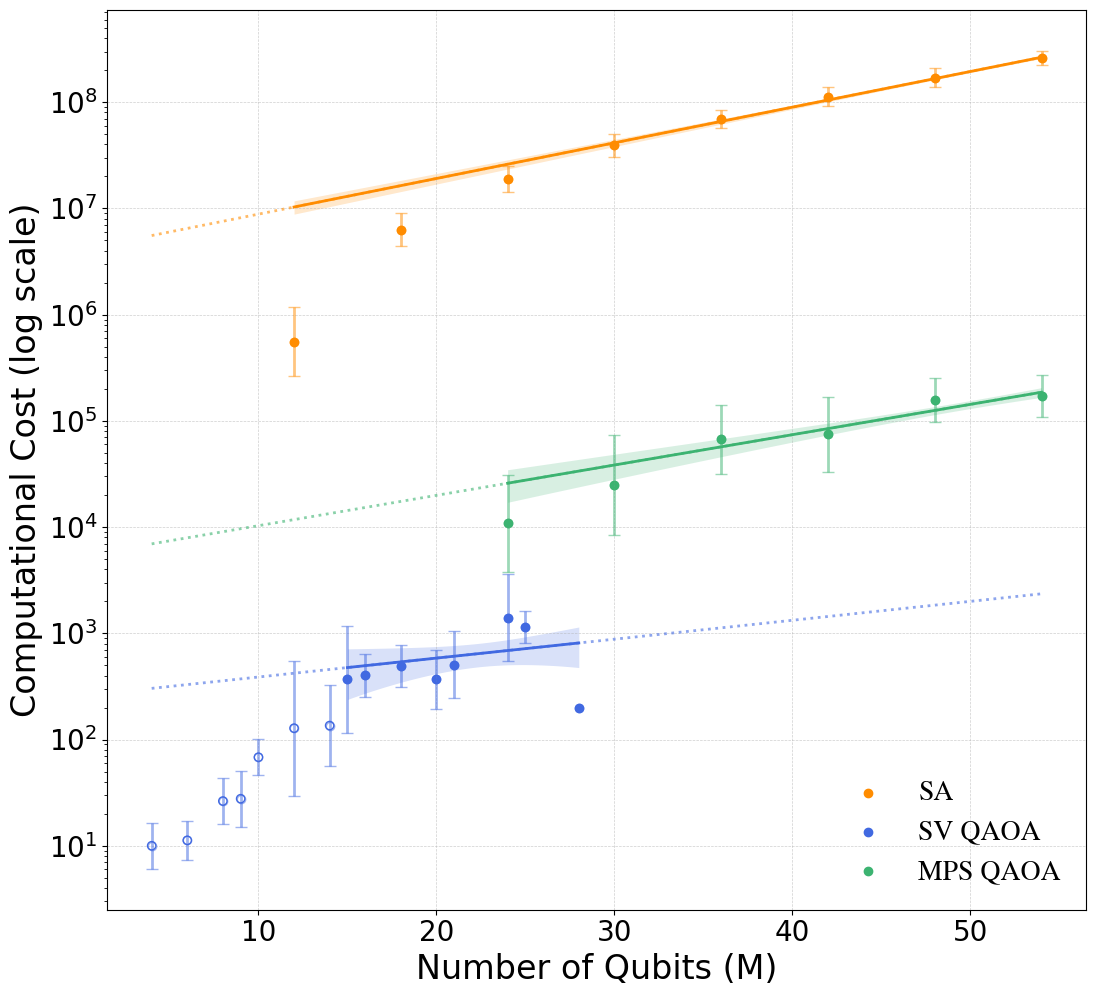

In [5]:
from proteinfolding.plotter_statevector_mps import DataPlotter
import pandas as pd
cpu_df = pd.read_csv("complexity_SA_stats_6res.csv")
qpu_df = pd.read_csv("QPU_calls_stats_p4_real.csv")
qpu_df_mps = pd.read_csv("QPU_calls_stats_mps_6res.csv")

save_path="/Users/aag/Documents/proteinfolding/plots/xy_qaoa/cpu_vs_qpu"

plotter = DataPlotter(cpu_df, qpu_df, qpu_df_mps)

plotter.plot_scaling_semilog_exp_fit(save_path)

df_qpu_mps columns: ['num_res', 'num_rot', 'qpu_calls_mean', 'std_qpu_calls', 'num_qubits', 'method', 'p']
Checking MPS success_df columns: ['num_res', 'num_rot', 'p', 'ratio']
First few rows of success_df:
   num_res  num_rot   p     ratio
0        6        4  25  1.000000
1        5        5  25  1.000000
2        6        6  25  1.000000
3        6        7  25  0.990000
4        6        8  25  0.712121
SA (corrected) LOOCV Slope: 0.107 ± 0.015
SA (corrected) Exp Fit: A = 7.50e+05, B = 0.103 ± 0.026, R² = 0.4257
SV QAOA LOOCV Slope: 0.049 ± 0.042
SV QAOA Exp Fit: A = 2.57e+02, B = 0.041 ± 0.059, R² = -0.0773
MPS QAOA (corrected) LOOCV Slope: 0.103 ± 0.013
MPS QAOA (corrected) Exp Fit: A = 1.70e+03, B = 0.098 ± 0.012, R² = 0.9438


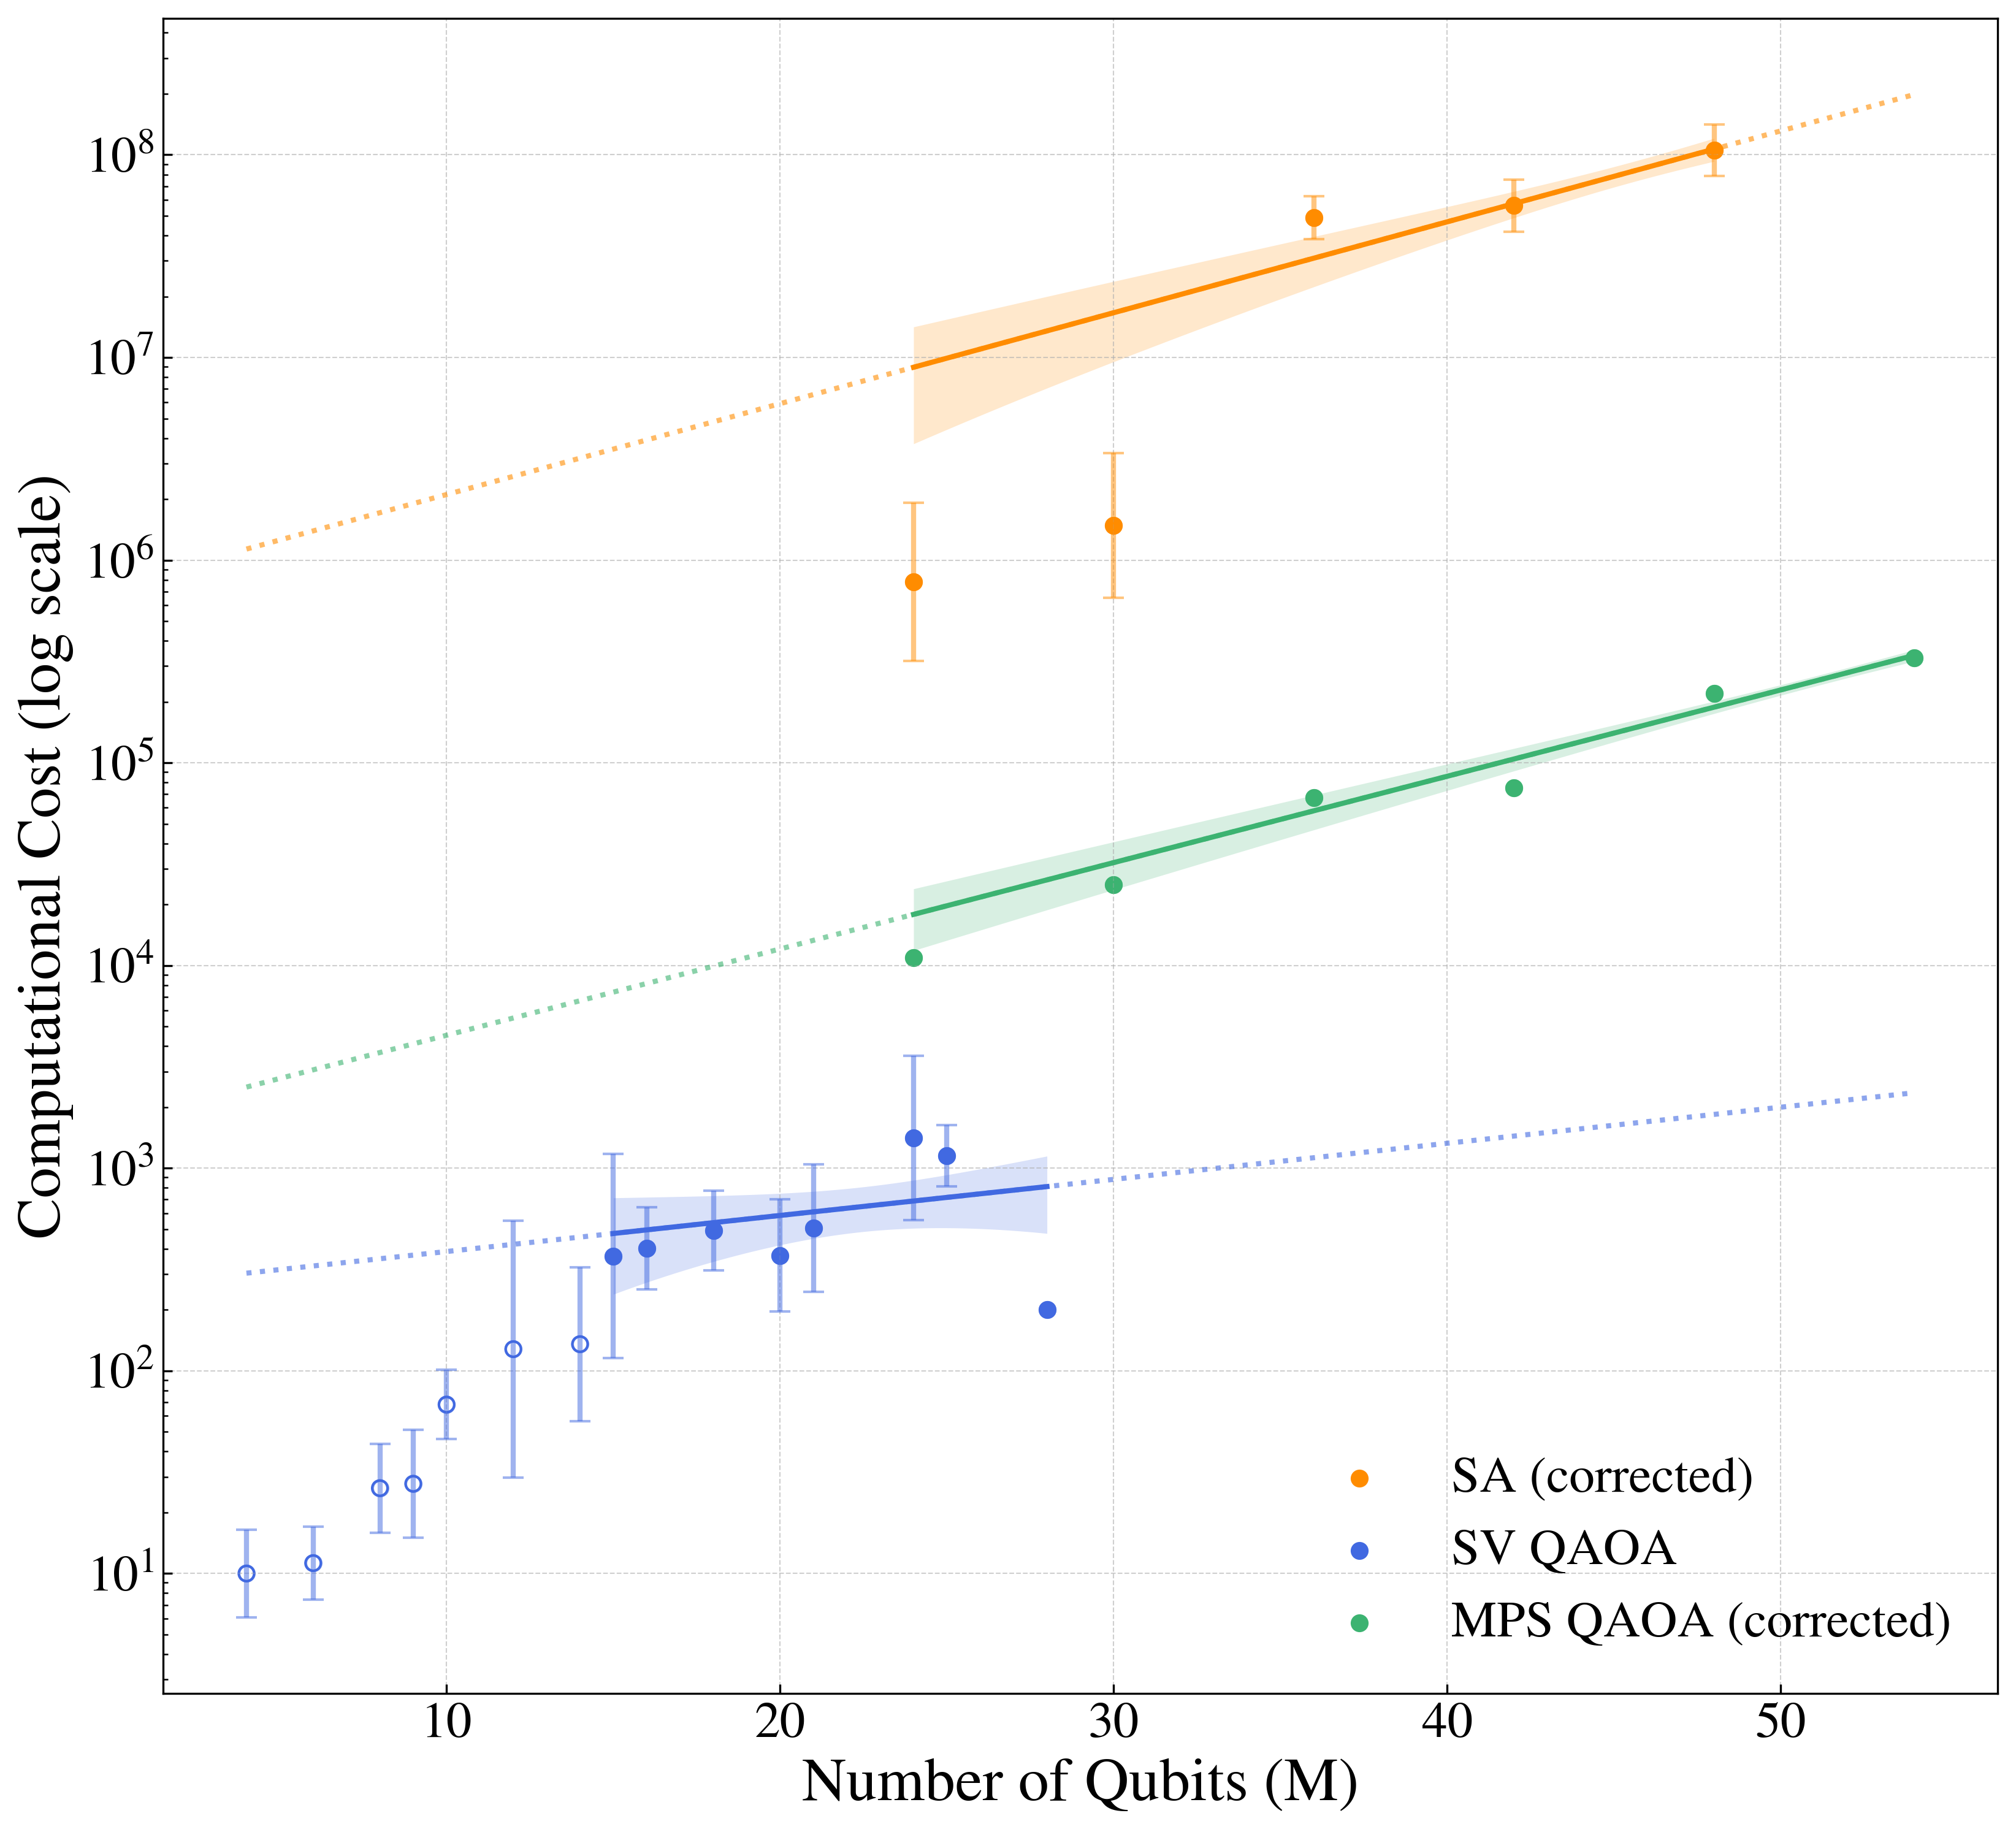

In [10]:
sa_success = pd.read_csv("success_ratio_SA_6res.csv")
mps_success = pd.read_csv("success_ratio_mps_6res.csv")
# print("mps_success columns:", mps_success.columns.tolist())
# print(mps_success.head())

plotter.plot_scaling_with_convergence_correction(sa_success, mps_success, save_path=None)

SA (/ 10^9 Hz) LOOCV Slope: 0.084 ± 0.004
SA (/ 10^9 Hz) Exp Fit: A = 3.38e-03, B = 0.083 ± 0.007, R² = 0.8646
SV QAOA (/ 10^3 Hz) LOOCV Slope: 0.049 ± 0.042
SV QAOA (/ 10^3 Hz) Exp Fit: A = 2.57e-01, B = 0.041 ± 0.059, R² = -0.0773
MPS QAOA (/ 10^4 Hz) LOOCV Slope: 0.048 ± 0.004
MPS QAOA (/ 10^4 Hz) Exp Fit: A = 2.23e-01, B = 0.048 ± 0.007, R² = 0.9030

📈 Central Fit Crossovers
- SA vs SV: x = 103.53 qubits, runtime ≈ 1.79e+01 s
- SA vs MPS: x = 120.23 qubits, runtime ≈ 7.15e+01 s

📉 Error Band Crossovers
- SA lower vs MPS upper: x = 200.41 qubits
- SA upper vs MPS lower: x = 122.67 qubits


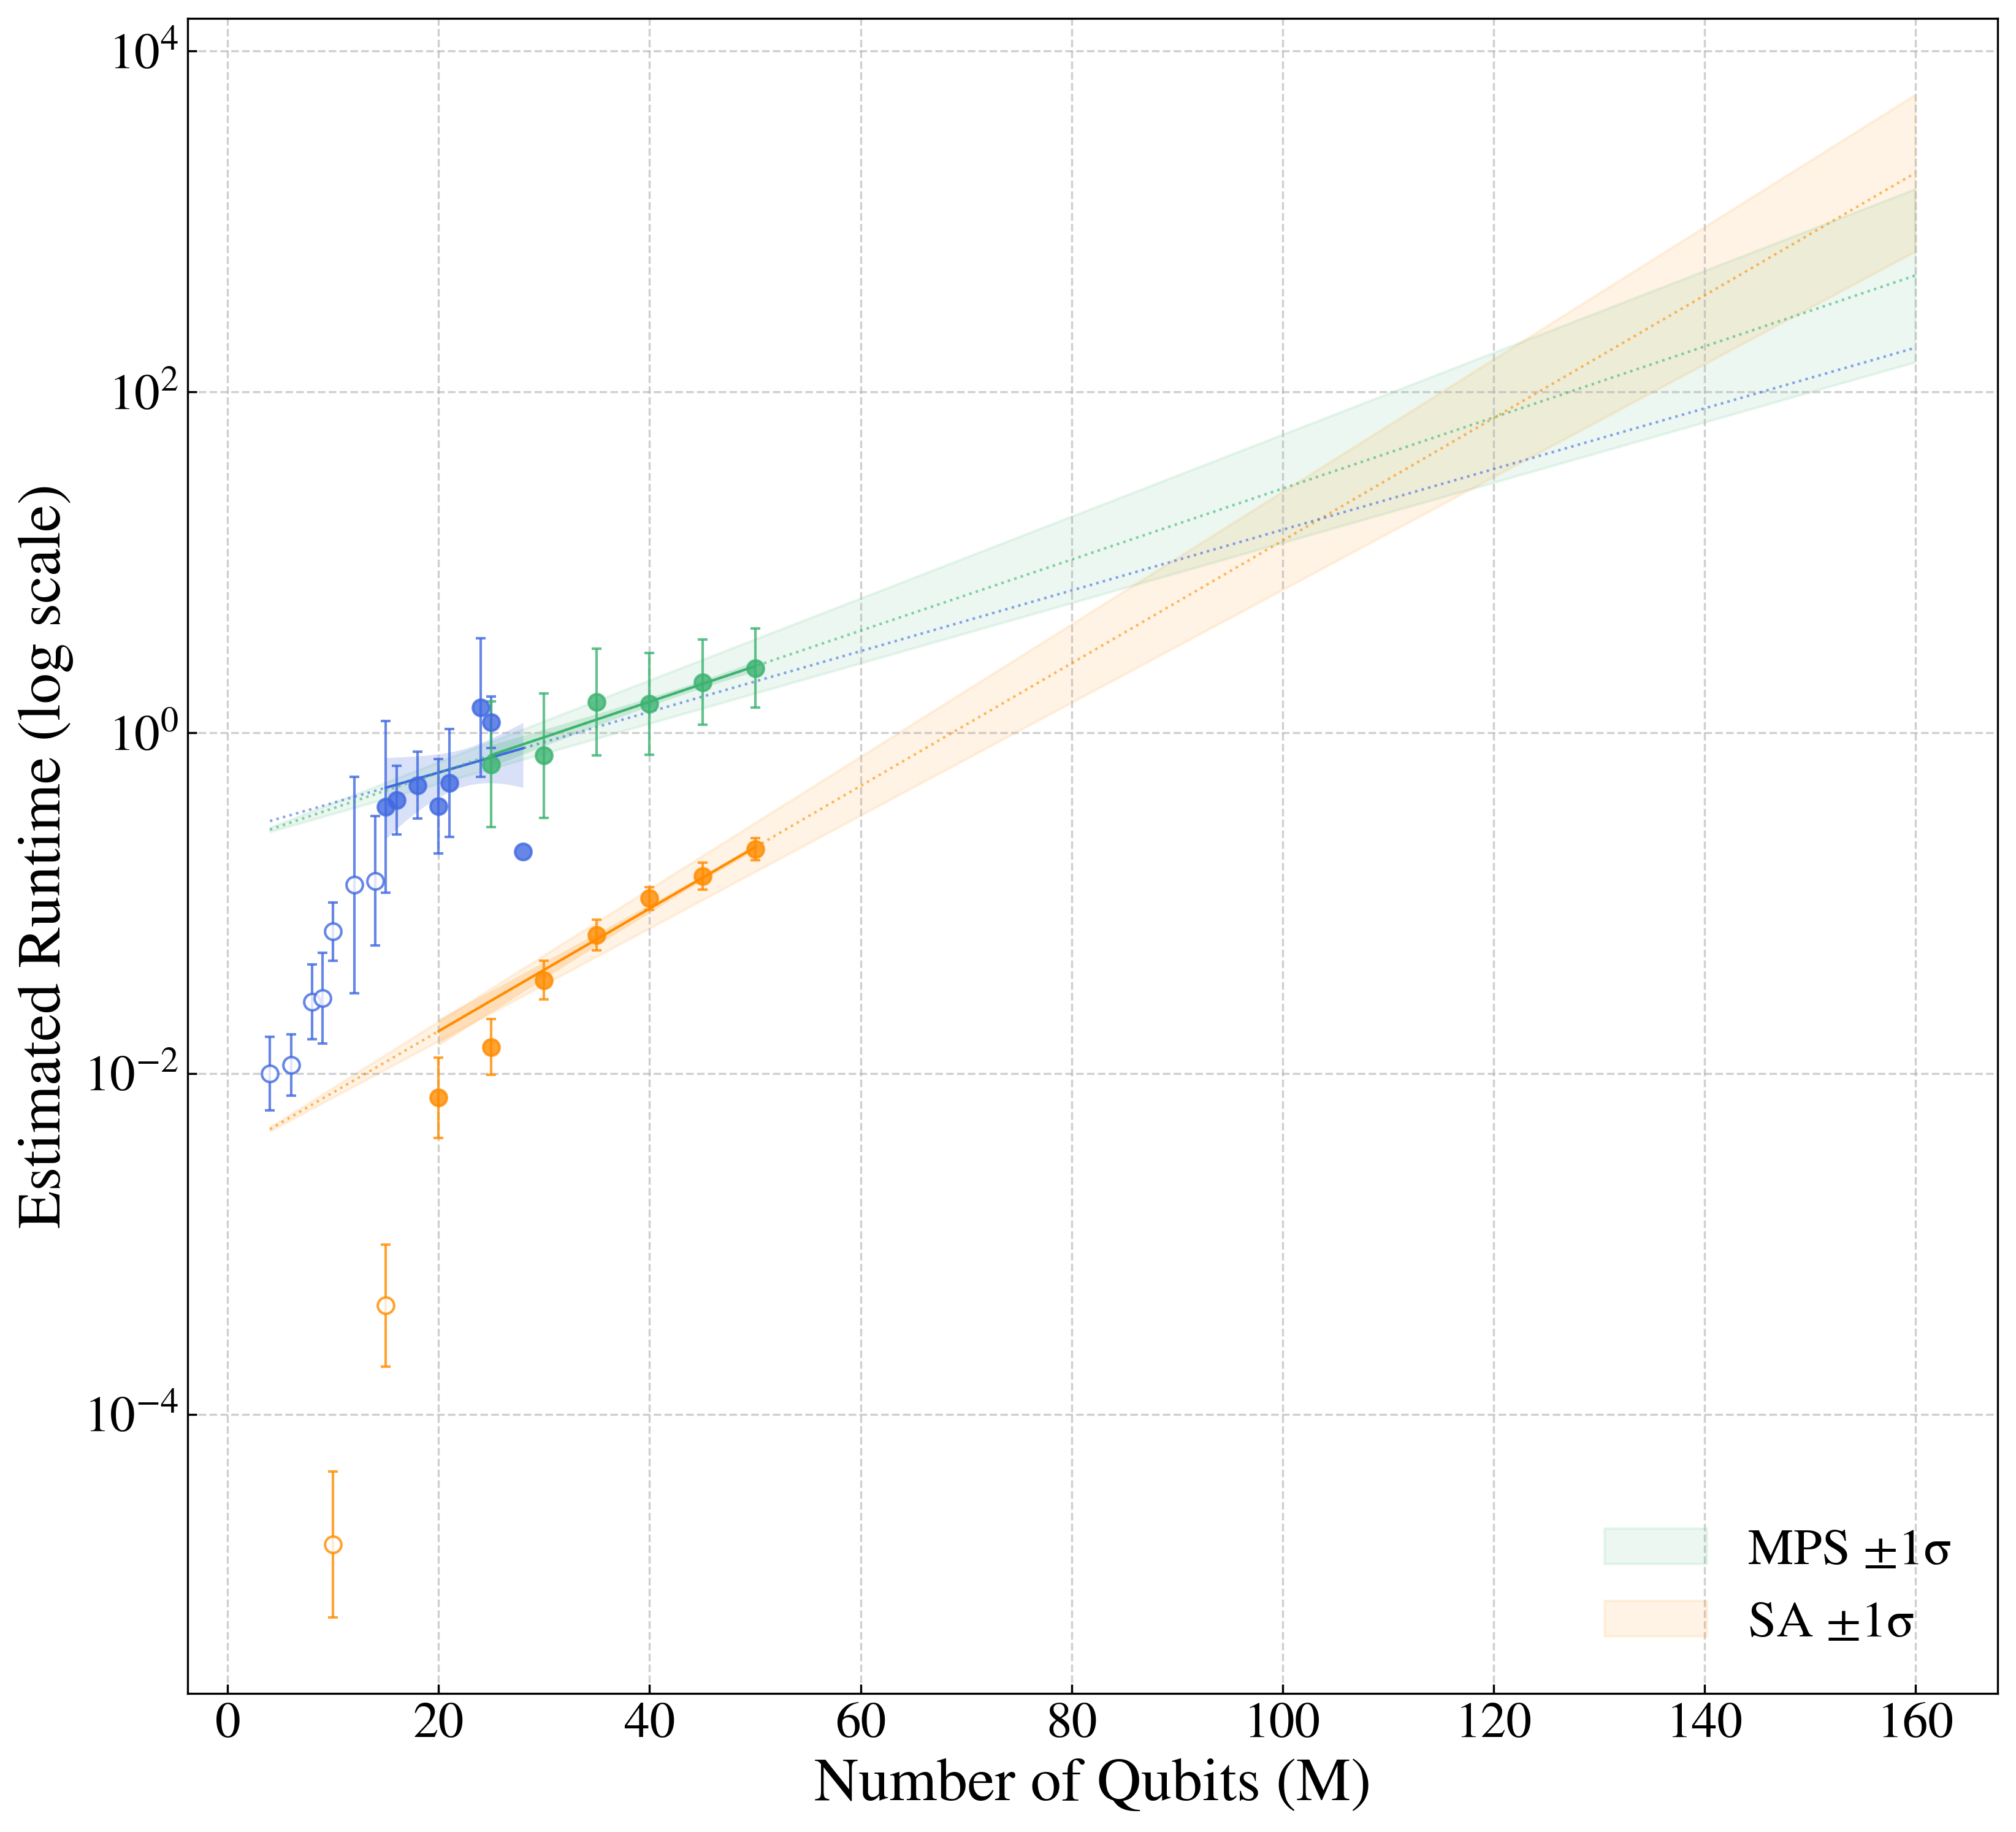

In [8]:
plotter.plot_scaling_normalized(save_path='/Users/aag/Documents/proteinfolding/plots/xy_qaoa/cpu_vs_qpu')

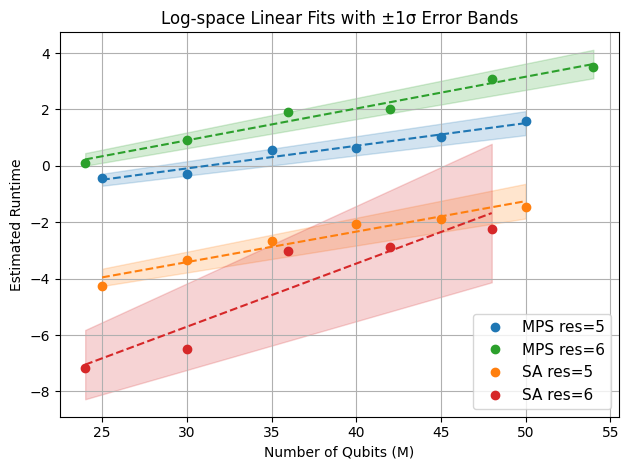

In [ ]:
import matplotlib.pyplot as plt

# Colors for each curve
color_5_mps = 'tab:blue'
color_6_mps = 'tab:green'
color_5_sa = 'tab:orange'
color_6_sa = 'tab:red'

# --- MPS res=5 ---
y5_MPS_corrected_norm = y5_MPS_corrected - np.log(1e4)
intercept5_MPS_corr = (y5_MPS_corrected_norm - grad_res5_MPS_corrected * x5_MPS).mean()
y5_mps_fit = grad_res5_MPS_corrected * x5_MPS + intercept5_MPS_corr
y5_mps_upper = (grad_res5_MPS_corrected + std_err_5_MPS_corr) * x5_MPS + intercept5_MPS_corr
y5_mps_lower = (grad_res5_MPS_corrected - std_err_5_MPS_corr) * x5_MPS + intercept5_MPS_corr

plt.plot(x5_MPS, y5_MPS_corrected_norm, 'o', color=color_5_mps, label='MPS res=5')
plt.plot(x5_MPS, y5_mps_fit, '--', color=color_5_mps)
plt.fill_between(x5_MPS, y5_mps_lower, y5_mps_upper, color=color_5_mps, alpha=0.2)

# --- MPS res=6 ---
y6_MPS_corrected_norm = y6_MPS_corrected - np.log(1e4)
intercept6_MPS_corr = (y6_MPS_corrected_norm - grad_res6_MPS_corrected * x6_MPS).mean()
y6_mps_fit = grad_res6_MPS_corrected * x6_MPS + intercept6_MPS_corr
y6_mps_upper = (grad_res6_MPS_corrected + std_err_6_MPS_corr) * x6_MPS + intercept6_MPS_corr
y6_mps_lower = (grad_res6_MPS_corrected - std_err_6_MPS_corr) * x6_MPS + intercept6_MPS_corr

plt.plot(x6_MPS, y6_MPS_corrected_norm, 'o', color=color_6_mps, label='MPS res=6')
plt.plot(x6_MPS, y6_mps_fit, '--', color=color_6_mps)
plt.fill_between(x6_MPS, y6_mps_lower, y6_mps_upper, color=color_6_mps, alpha=0.2)

# --- SA res=5 ---
y5_SA_corrected_norm = y5_SA_corrected - np.log(1e9)
intercept5_SA_corr = (y5_SA_corrected_norm - grad_res5_SA_corrected * x5_SA).mean()
y5_sa_fit = grad_res5_SA_corrected * x5_SA + intercept5_SA_corr
y5_sa_upper = (grad_res5_SA_corrected + std_err_5_SA_corr) * x5_SA + intercept5_SA_corr
y5_sa_lower = (grad_res5_SA_corrected - std_err_5_SA_corr) * x5_SA + intercept5_SA_corr

plt.plot(x5_SA, y5_SA_corrected_norm, 'o', color=color_5_sa, label='SA res=5')
plt.plot(x5_SA, y5_sa_fit, '--', color=color_5_sa)
plt.fill_between(x5_SA, y5_sa_lower, y5_sa_upper, color=color_5_sa, alpha=0.2)

# --- SA res=6 ---
y6_SA_corrected_norm = y6_SA_corrected - np.log(1e9)
intercept6_SA_corr = (y6_SA_corrected_norm - grad_res6_SA_corrected * x6_SA).mean()
y6_sa_fit = grad_res6_SA_corrected * x6_SA + intercept6_SA_corr
y6_sa_upper = (grad_res6_SA_corrected + std_err_6_SA_corr) * x6_SA + intercept6_SA_corr
y6_sa_lower = (grad_res6_SA_corrected - std_err_6_SA_corr) * x6_SA + intercept6_SA_corr

plt.plot(x6_SA, y6_SA_corrected_norm, 'o', color=color_6_sa, label='SA res=6')
plt.plot(x6_SA, y6_sa_fit, '--', color=color_6_sa)
plt.fill_between(x6_SA, y6_sa_lower, y6_sa_upper, color=color_6_sa, alpha=0.2)

# --- Final plot formatting ---
plt.xlabel("Number of Qubits (M)")
plt.ylabel("Estimated Runtime")
plt.title("Log-space Linear Fits with ±1σ Error Bands")
plt.grid(True)
plt.legend(fontsize=11, loc='lower right')
plt.tight_layout()
plt.show()


Checking MPS success_df columns: ['num_res', 'num_rot', 'p', 'ratio']
First few rows of success_df:
   num_res  num_rot  p  ratio
0        5        5  4  0.996
1        5        6  4  0.996
2        5        7  4  0.871
3        5        8  4  0.781
4        5        9  4  0.713
SA (/ 10^9 Hz) LOOCV Slope: 0.085 ± 0.004
SA (/ 10^9 Hz) Exp Fit: A = 3.62e-03, B = 0.084 ± 0.009, R² = 0.8433
QAOA Statevector (/ 10^3 Hz) LOOCV Slope: 0.049 ± 0.042
QAOA Statevector (/ 10^3 Hz) Exp Fit: A = 2.57e-01, B = 0.041 ± 0.059, R² = -0.0773
QAOA MPS (/ 10^4 Hz) LOOCV Slope: 0.083 ± 0.007
QAOA MPS (/ 10^4 Hz) Exp Fit: A = 6.95e-02, B = 0.084 ± 0.009, R² = 0.9540

📈 Central Fit Crossovers
- SA vs SV: x = 99.85 qubits, runtime ≈ 1.54e+01 s
- SA vs MPS: x = -5549.49 qubits, runtime ≈ 6.68e-205 s

📉 Error Band Crossovers
- SA lower vs MPS upper: x = -163.79 qubits
- SA upper vs MPS lower: x = 360.16 qubits


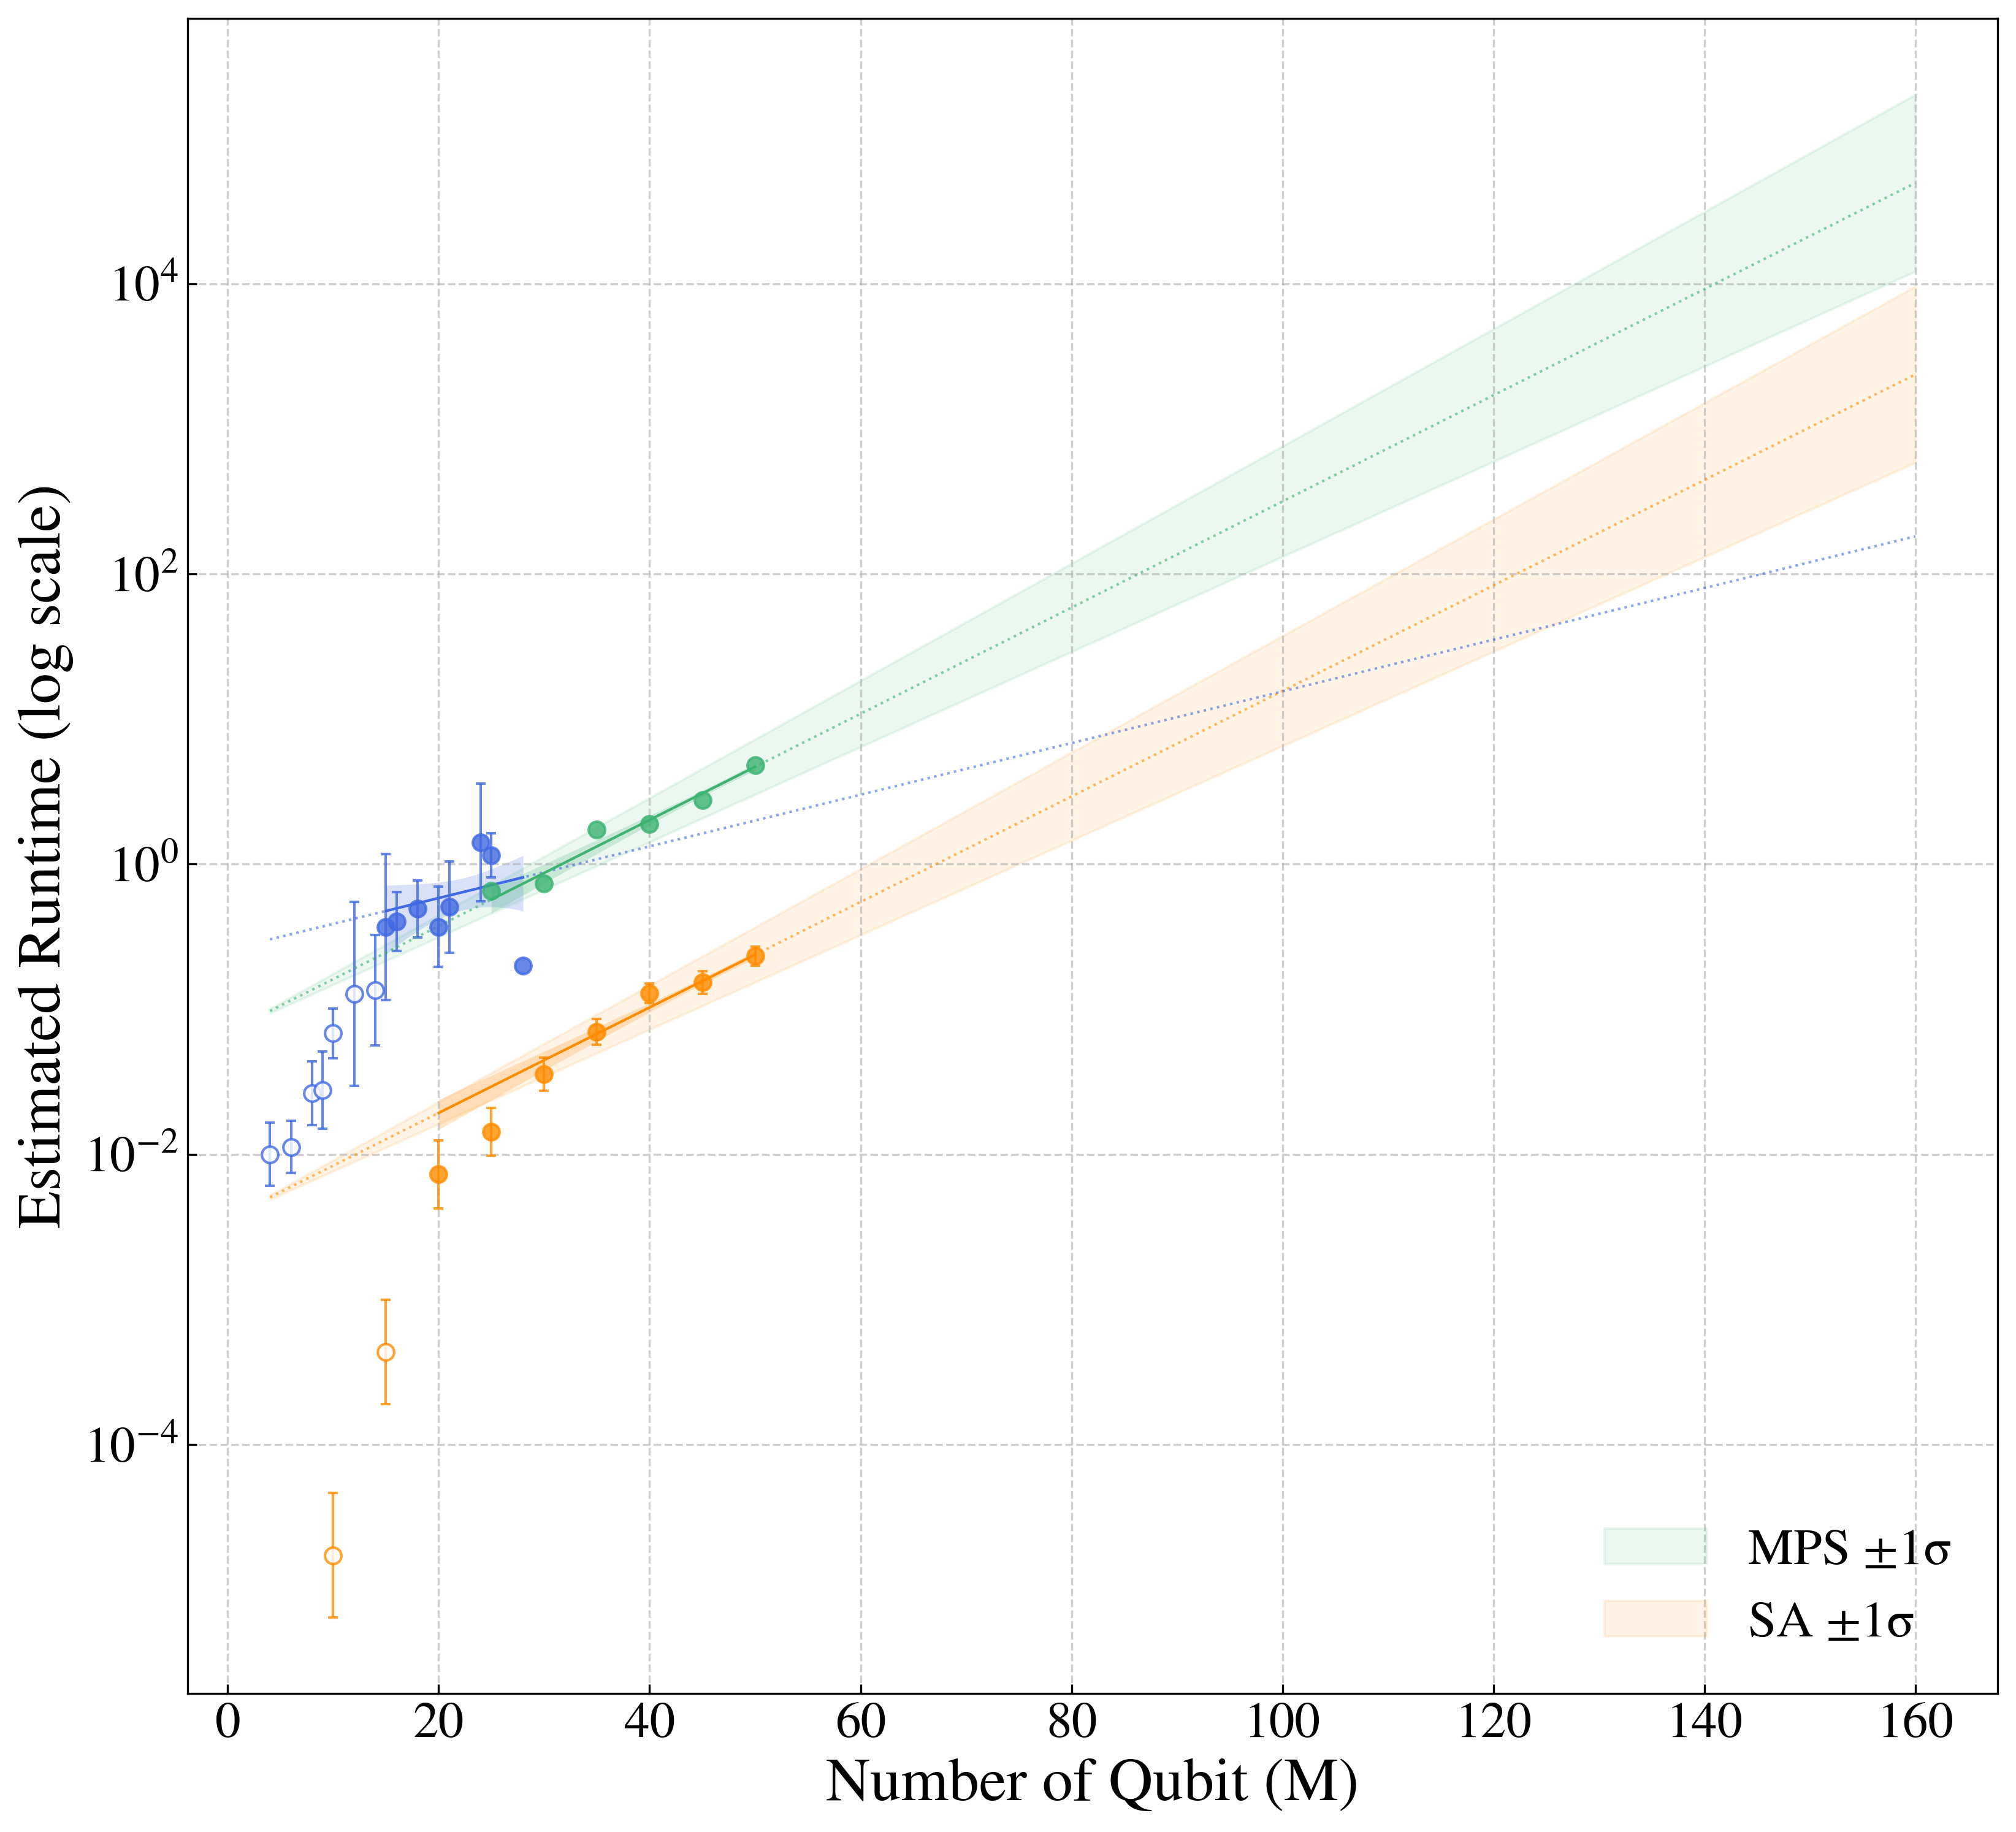

In [9]:
plotter.plot_scaling_normalized_with_convergence_correction(sa_success, mps_success, save_path=None)


📊 Plotting normalized scaling for num_rot = 2
❌ Not enough points to fit (0 < 2) for SA (/ 10^9 Hz)
❌ Not enough points to fit (1 < 2) for SV QAOA (/ 10^3 Hz)
⚠️ Skipping plot for num_rot = 2, no successful fits

📊 Plotting normalized scaling for num_rot = 3
❌ Not enough points to fit (0 < 2) for SA (/ 10^9 Hz)
SV QAOA (/ 10^3 Hz) Exp Fit: A = 1.68e-01, B = 0.054 ± 0.029, R² = 0.8050


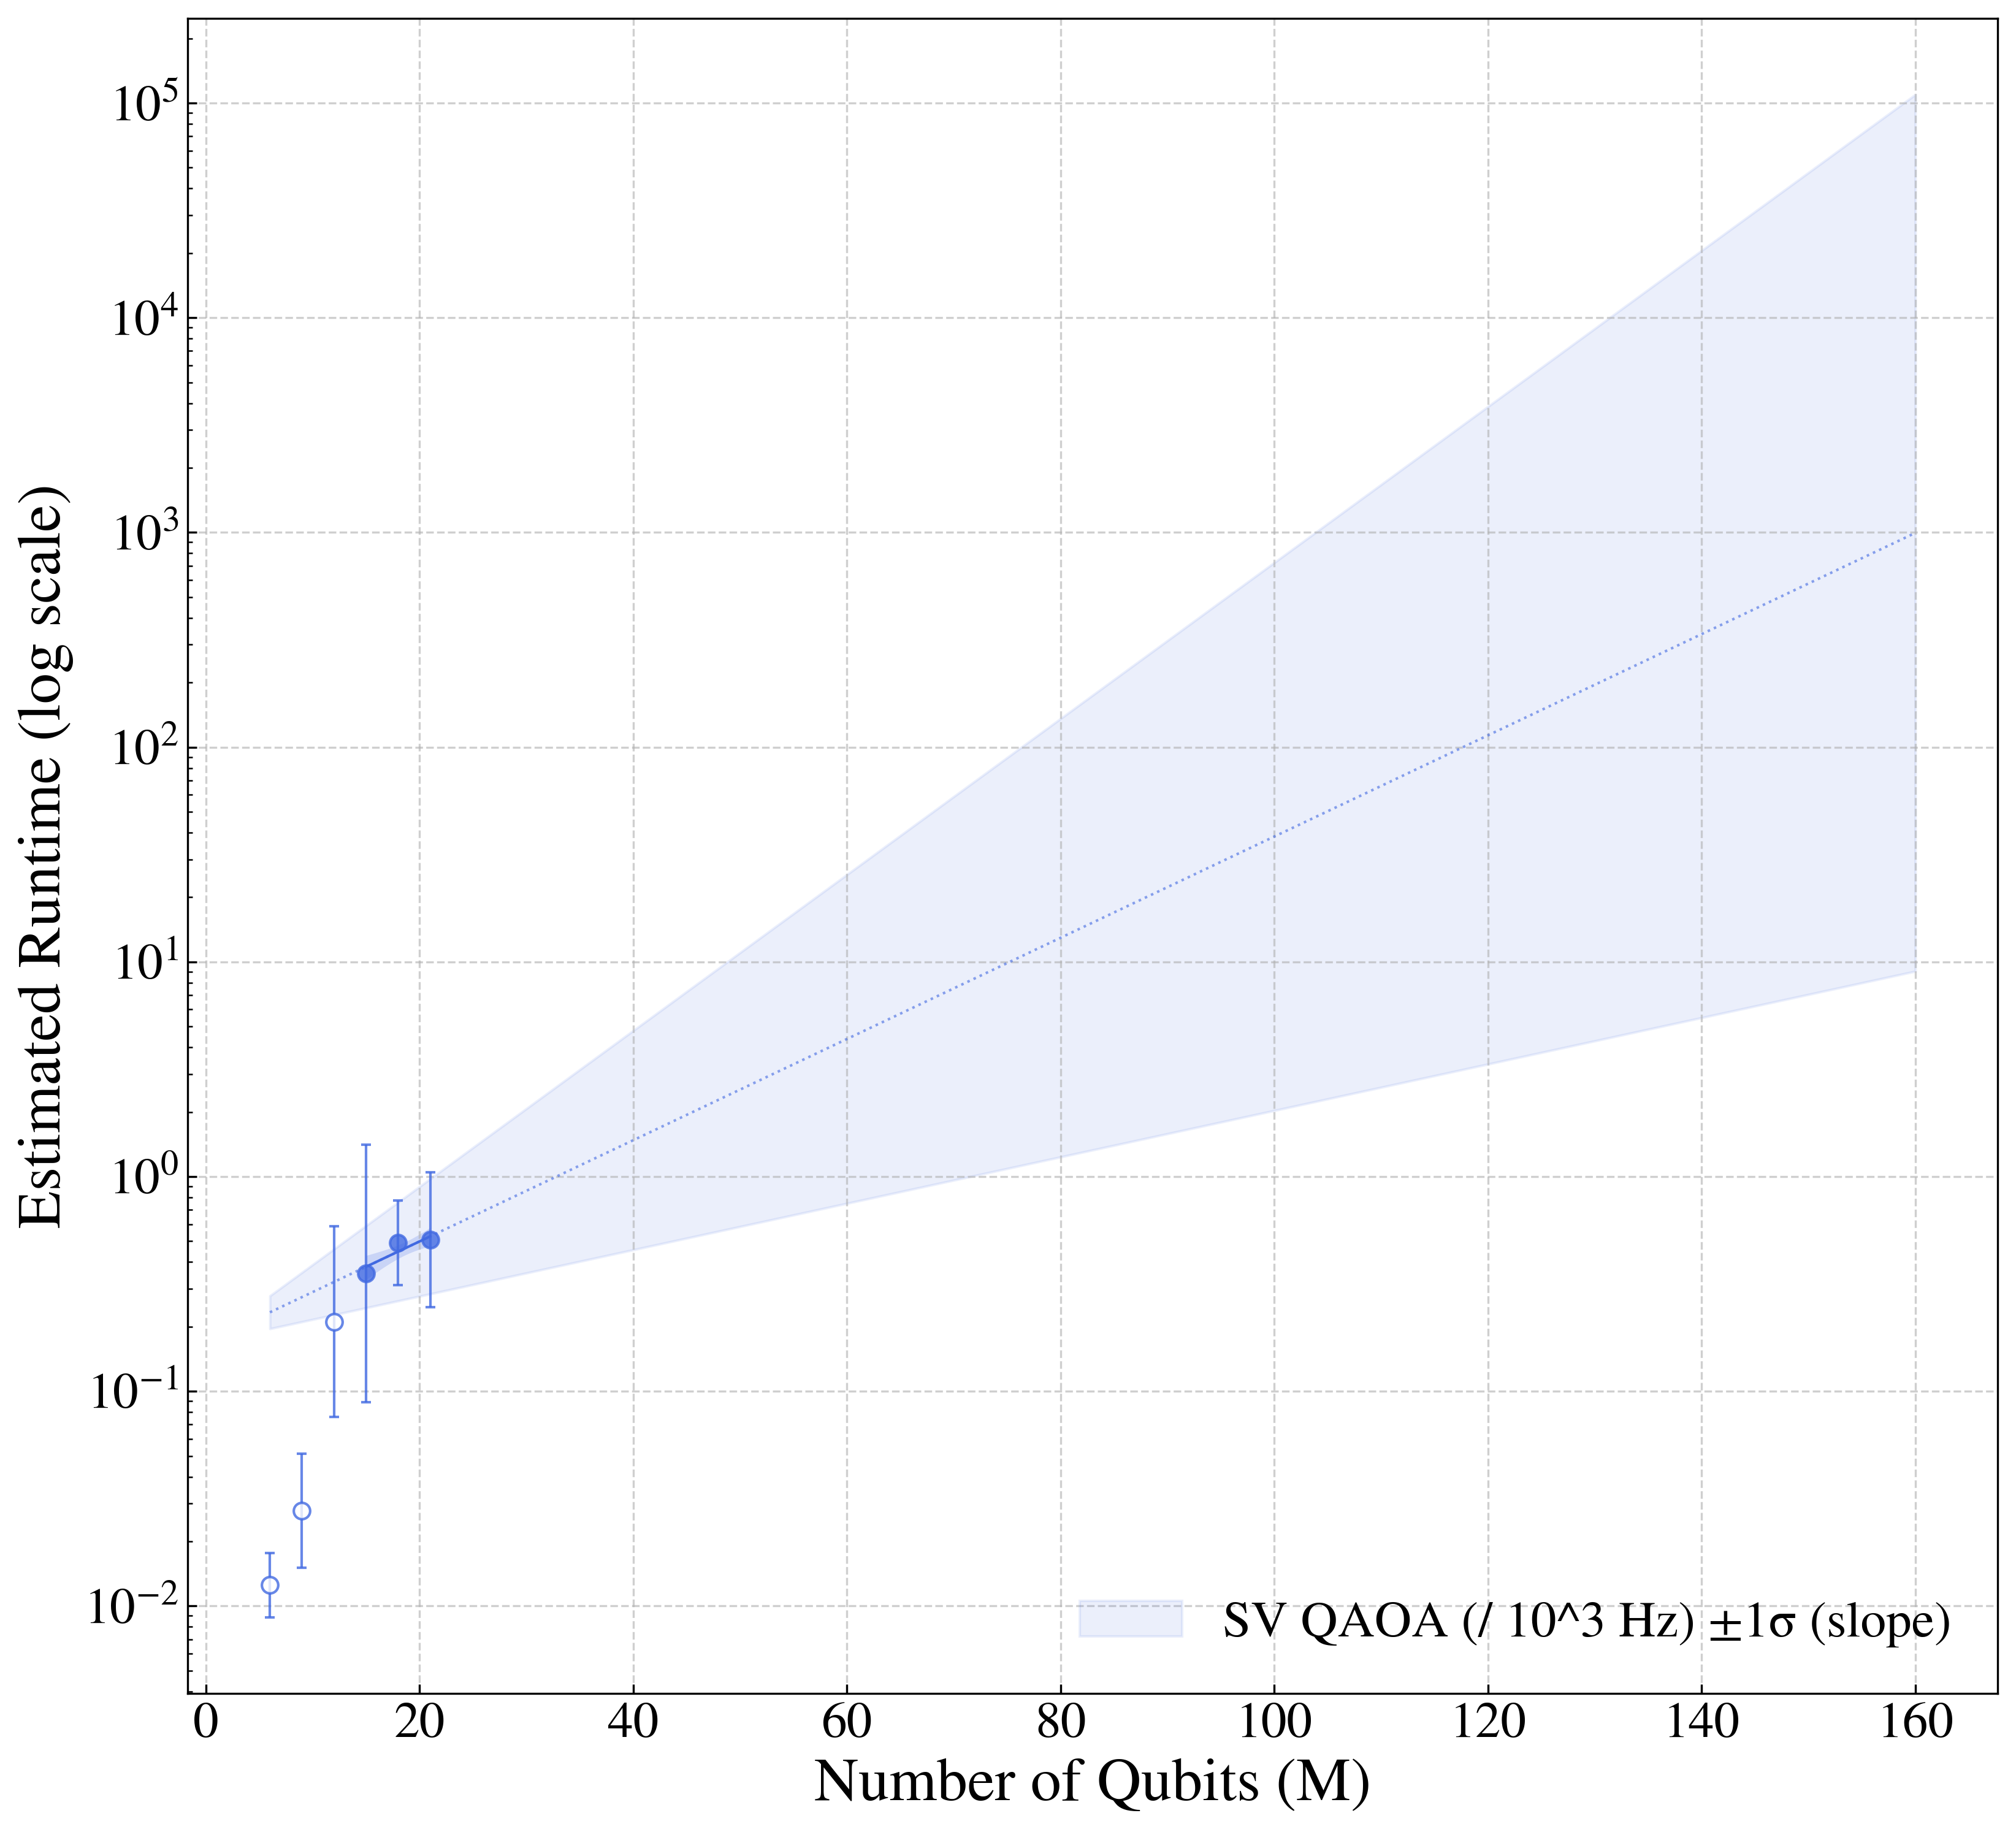


📊 Plotting normalized scaling for num_rot = 4
❌ Not enough points to fit (1 < 2) for SA (/ 10^9 Hz)
SV QAOA (/ 10^3 Hz) LOOCV Slope: 0.037 ± 0.109
SV QAOA (/ 10^3 Hz) Exp Fit: A = 4.79e-01, B = 0.011 ± 0.122, R² = -0.1633


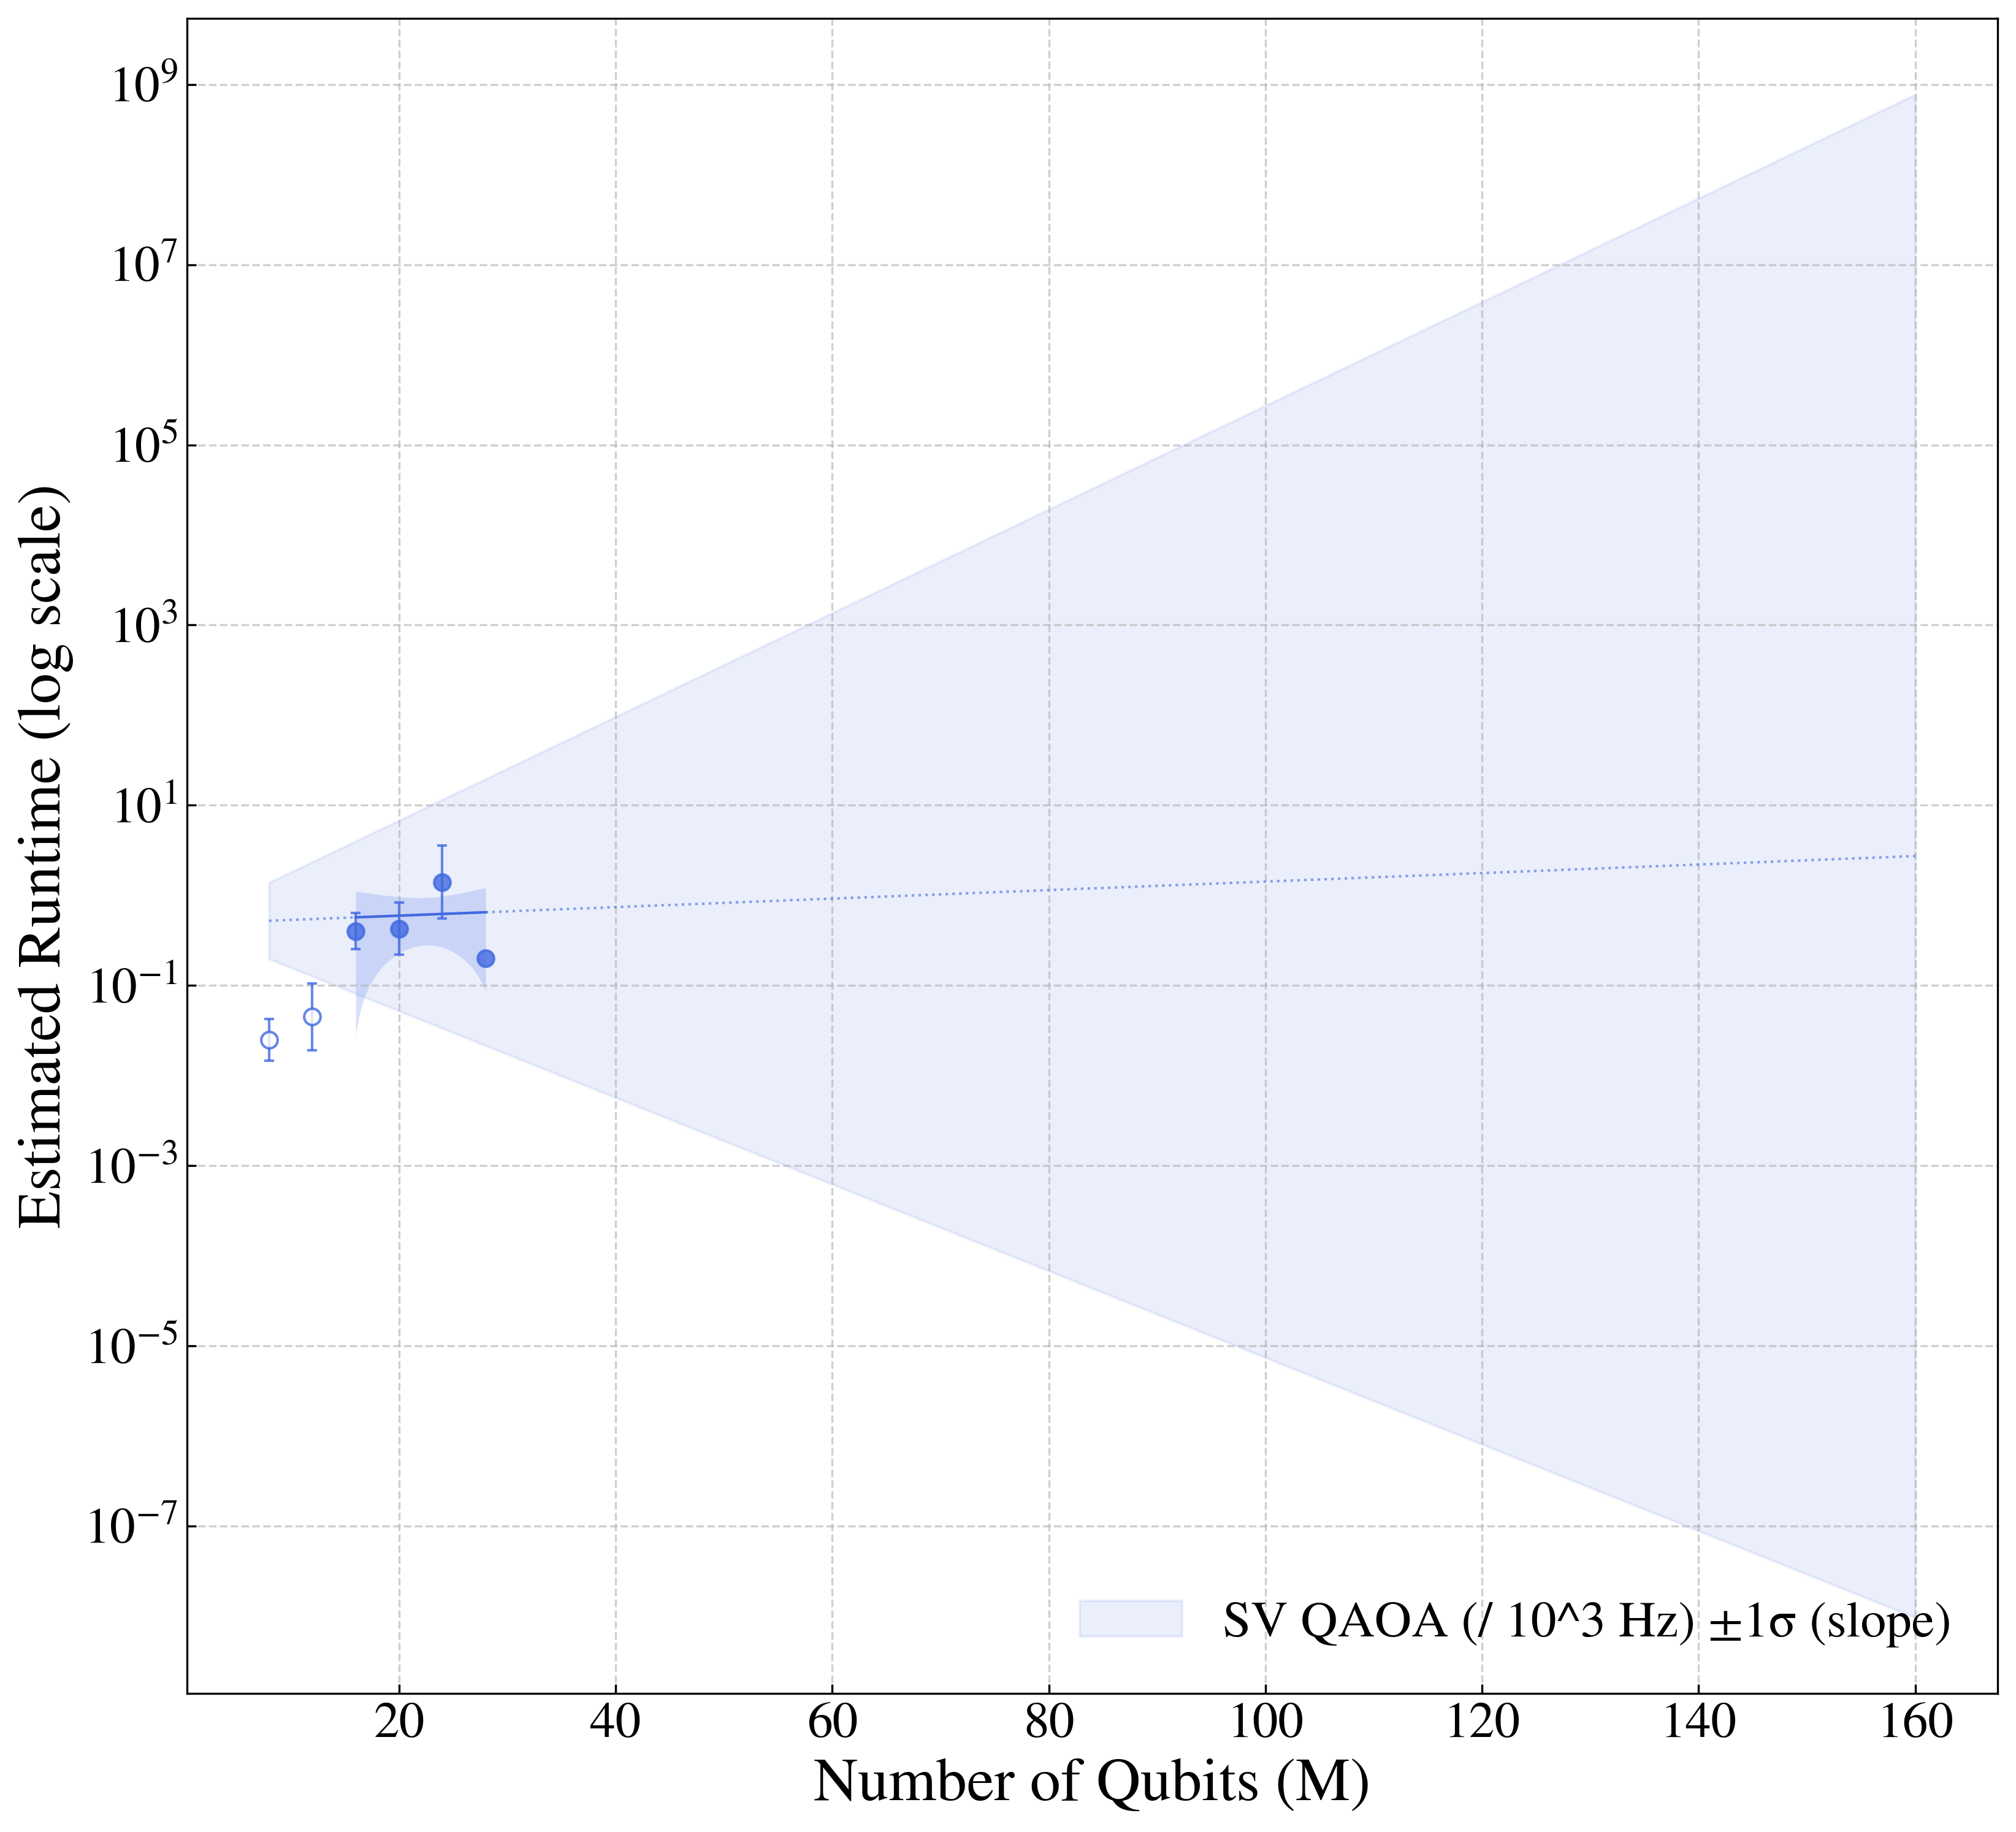


📊 Plotting normalized scaling for num_rot = 5
❌ Not enough points to fit (1 < 2) for SA (/ 10^9 Hz)
SV QAOA (/ 10^3 Hz) Exp Fit: A = 1.44e-02, B = 0.174 ± 0.087, R² = 0.3807
❌ Not enough points to fit (1 < 2) for MPS QAOA (/ 10^4 Hz)


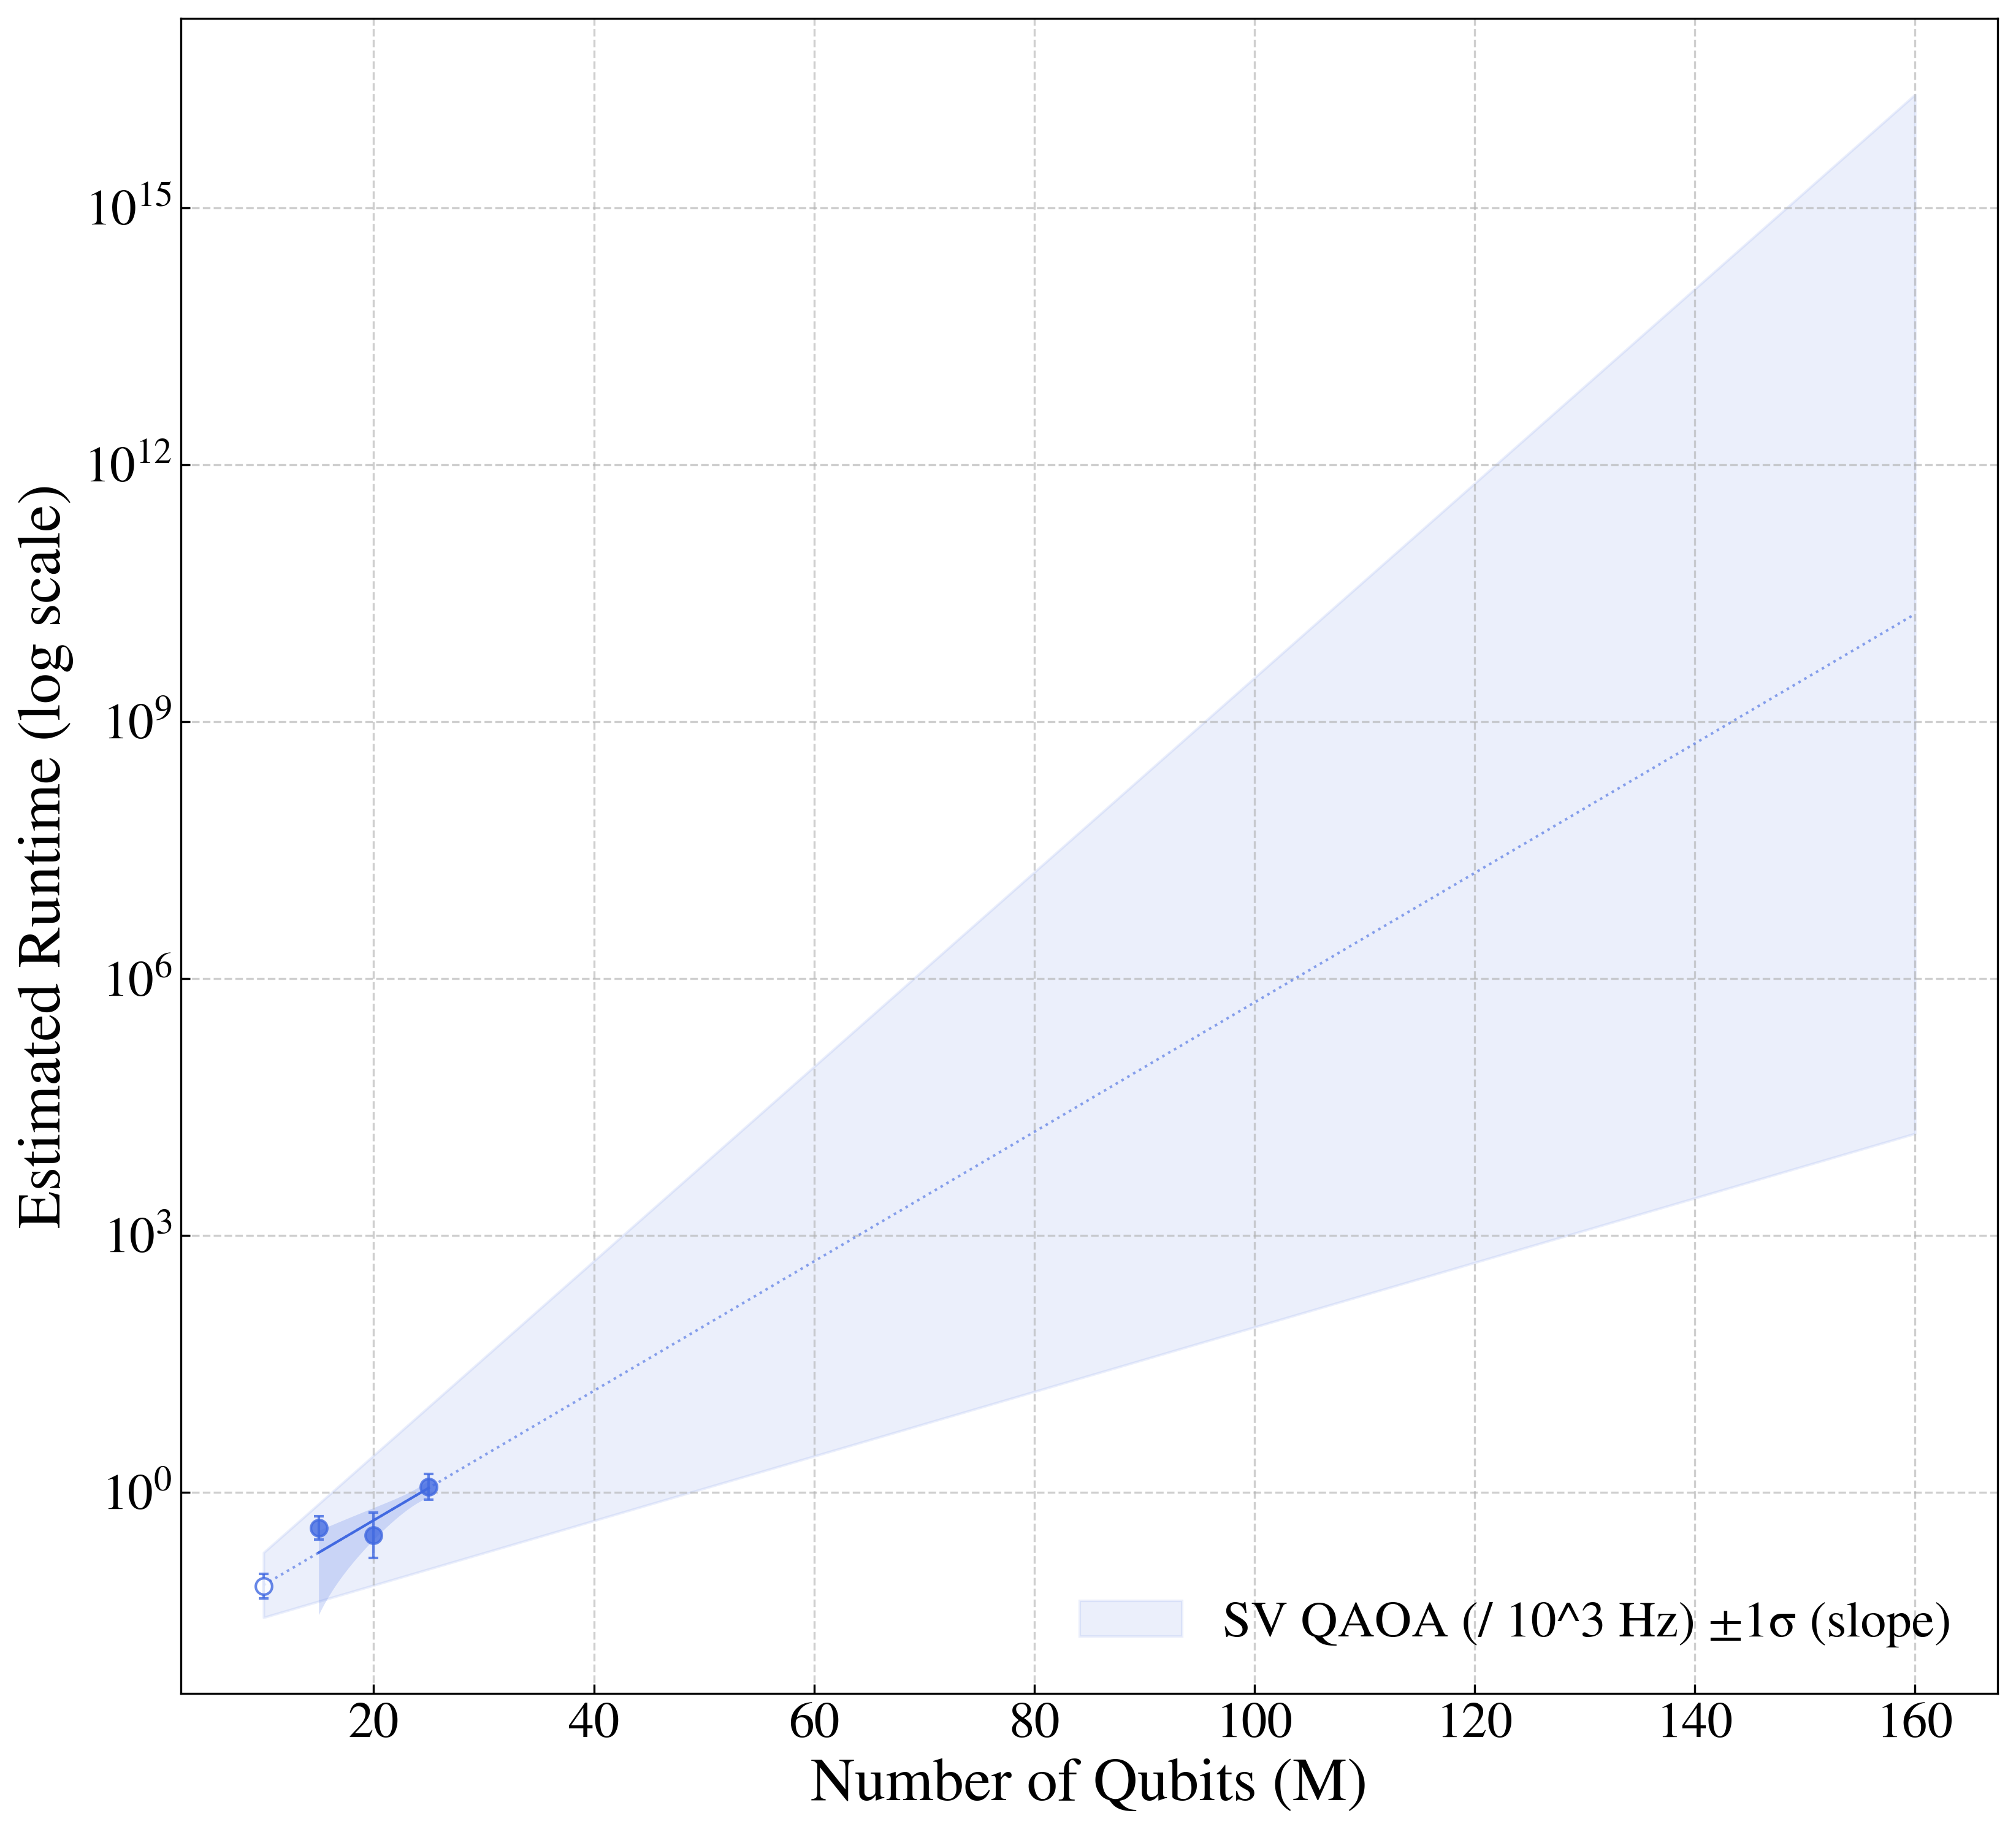


📊 Plotting normalized scaling for num_rot = 6
❌ Not enough points to fit (1 < 2) for SA (/ 10^9 Hz)
❌ Not enough points to fit (1 < 2) for MPS QAOA (/ 10^4 Hz)
⚠️ Skipping plot for num_rot = 6, no successful fits

📊 Plotting normalized scaling for num_rot = 7
❌ Not enough points to fit (1 < 2) for SA (/ 10^9 Hz)
❌ Not enough points to fit (1 < 2) for MPS QAOA (/ 10^4 Hz)
⚠️ Skipping plot for num_rot = 7, no successful fits

📊 Plotting normalized scaling for num_rot = 8
❌ Not enough points to fit (1 < 2) for SA (/ 10^9 Hz)
❌ Not enough points to fit (1 < 2) for MPS QAOA (/ 10^4 Hz)
⚠️ Skipping plot for num_rot = 8, no successful fits

📊 Plotting normalized scaling for num_rot = 9
❌ Not enough points to fit (1 < 2) for SA (/ 10^9 Hz)
❌ Not enough points to fit (1 < 2) for MPS QAOA (/ 10^4 Hz)
⚠️ Skipping plot for num_rot = 9, no successful fits

📊 Plotting normalized scaling for num_rot = 10
❌ Not enough points to fit (1 < 2) for SA (/ 10^9 Hz)
❌ Not enough points to fit (1 < 2) for MPS

In [10]:
plotter.plot_scaling_normalized_per_num_rot()

In [394]:
from proteinfolding.plotter_statevector_mps import DataPlotter

cpu_df = pd.read_csv("complexity_SA_stats_convergence.csv")
qpu_df = pd.read_csv("df_mean_shots.csv")
qpu_df_mps = pd.read_csv("QPU_calls_stats_mps.csv")

save_path="/Users/aag/Documents/proteinfolding/plots/xy_qaoa/cpu_vs_qpu"

plotter = DataPlotter(cpu_df, qpu_df, qpu_df_mps)

plotter.plot_qpu_calls_by_p(plotter.df_qpu_sv)

KeyError: 'qpu_calls'

/var/folders/zr/_ww60qvd18j868qh1qhtky300000gn/T/ipykernel_99769/72085424.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cpu_stats_1 = cpu_df_1.groupby("num_qubits", group_keys=False).apply(weighted_stats).reset_index()


Weighted Exp Fit: A = 3.91e+05, B = 0.105
Weighted Exp Fit: A = 1.82e+05, B = 0.087


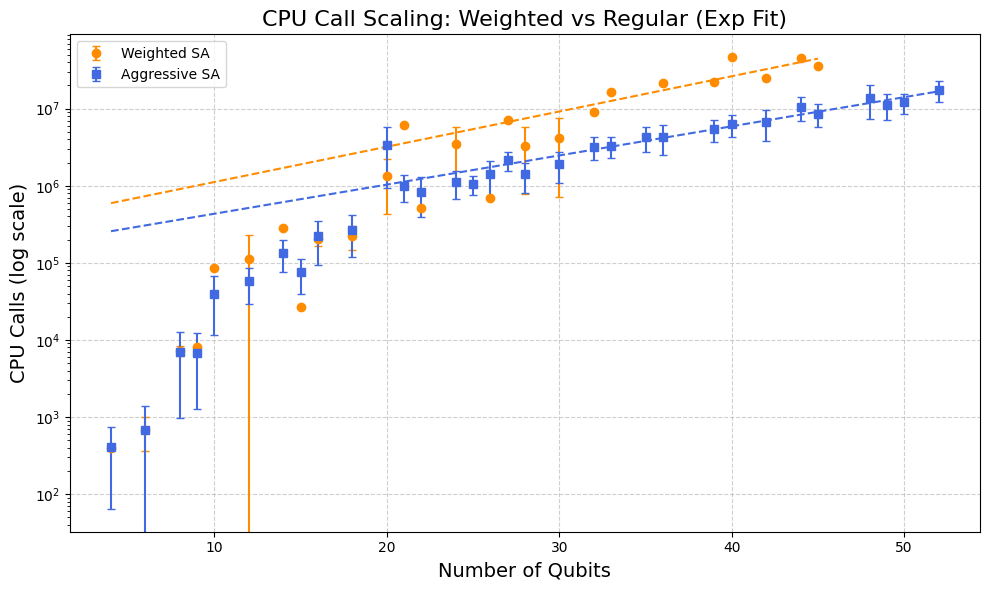

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the two CPU data files
cpu_df_1 = pd.read_csv("complexity_SA_stats_convergence.csv")
cpu_df_2 = pd.read_csv("complexity_SA_stats_convergence_2.csv")

# --- Weighted stats for CPU DF 1 ---
def weighted_stats(group):
    weights = group["convergence_ratio"]
    values = group["cpu_calls_mean"]
    mean = (values * weights).sum() / weights.sum()
    var = ((weights * (values - mean) ** 2).sum()) / weights.sum()
    std = np.sqrt(var)
    return pd.Series({"cpu_calls_mean": mean, "std_cpu_calls": std})

cpu_stats_1 = cpu_df_1.groupby("num_qubits", group_keys=False).apply(weighted_stats).reset_index()

# --- Regular stats for CPU DF 2 ---
cpu_stats_2 = cpu_df_2.groupby("num_qubits", group_keys=False).agg({
    "cpu_calls_mean": "mean",
    "std_cpu_calls": "mean"
}).reset_index()

# --- Exponential fit function ---
def exp_fit(x, A, B):
    return A * np.exp(B * x)

# --- Plot ---
plt.figure(figsize=(10, 6))

# Plot weighted
x1, y1, yerr1 = cpu_stats_1["num_qubits"], cpu_stats_1["cpu_calls_mean"], cpu_stats_1["std_cpu_calls"]
plt.errorbar(x1, y1, yerr=yerr1, fmt="o", label="Weighted SA", capsize=3, color="darkorange")
popt1, _ = curve_fit(exp_fit, x1, y1, p0=(y1.iloc[0], 0.1))
x_fit1 = np.linspace(x1.min(), x1.max(), 200)
plt.plot(x_fit1, exp_fit(x_fit1, *popt1), "--", color="darkorange")
slope = popt1[1]
print(f"Weighted Exp Fit: A = {popt1[0]:.2e}, B = {slope:.3f}")


# Plot regular
x2, y2, yerr2 = cpu_stats_2["num_qubits"], cpu_stats_2["cpu_calls_mean"], cpu_stats_2["std_cpu_calls"]
plt.errorbar(x2, y2, yerr=yerr2, fmt="s", label="Aggressive SA", capsize=3, color="royalblue")
popt2, _ = curve_fit(exp_fit, x2, y2, p0=(y2.iloc[0], 0.1))
x_fit2 = np.linspace(x2.min(), x2.max(), 200)
plt.plot(x_fit2, exp_fit(x_fit2, *popt2), "--", color="royalblue")
slope2 = popt2[1]
print(f"Weighted Exp Fit: A = {popt2[0]:.2e}, B = {slope2:.3f}")

# Final touches
plt.yscale("log")
plt.xlabel("Number of Qubits", fontsize=14)
plt.ylabel("CPU Calls (log scale)", fontsize=14)
plt.title("CPU Call Scaling: Weighted vs Regular (Exp Fit)", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
import pandas as pd
import glob
import os

# Step 1: Load and concatenate all CSV files matching the pattern
all_files = glob.glob("complexity_SA_stats_convergence*.csv")
df_list = [pd.read_csv(f) for f in all_files]
full_df = pd.concat(df_list, ignore_index=True)

# Step 2: Group by resolution and number of qubits
grouped_df = full_df.groupby(["num_res", "num_qubits"], as_index=False).agg({
    "cpu_calls_mean": "mean",             # average mean
    "std_cpu_calls": "mean",              # average std
    "successful_runs": "sum",             # total successes
    "total_runs": "sum",                  # total attempts
})

# Step 3: Recalculate the total convergence ratio
grouped_df["convergence_ratio"] = grouped_df["successful_runs"] / grouped_df["total_runs"]

# Step 4 (optional): Save to CSV
grouped_df.to_csv("combined_SA_stats_convergence.csv", index=False)
print("✅ Combined stats saved to combined_SA_stats_convergence.csv")

# Preview
grouped_df.head()


✅ Combined stats saved to combined_SA_stats_convergence.csv


num_res  num_qubits  cpu_calls_mean  std_cpu_calls  successful_runs  \
0        2           4          402.88     440.344463              200   
1        2           6         1000.44    1112.237564              200   
2        2           8         7387.84    7782.341802              200   
3        2          10        74116.00   66250.749001              200   
4        2          12       224001.36  219295.237647              200   

   total_runs  convergence_ratio  
0         200                1.0  
1         200                1.0  
2         200                1.0  
3         200                1.0  
4         200                1.0

Exp Fit: A = 6.52e+05, B = 0.066


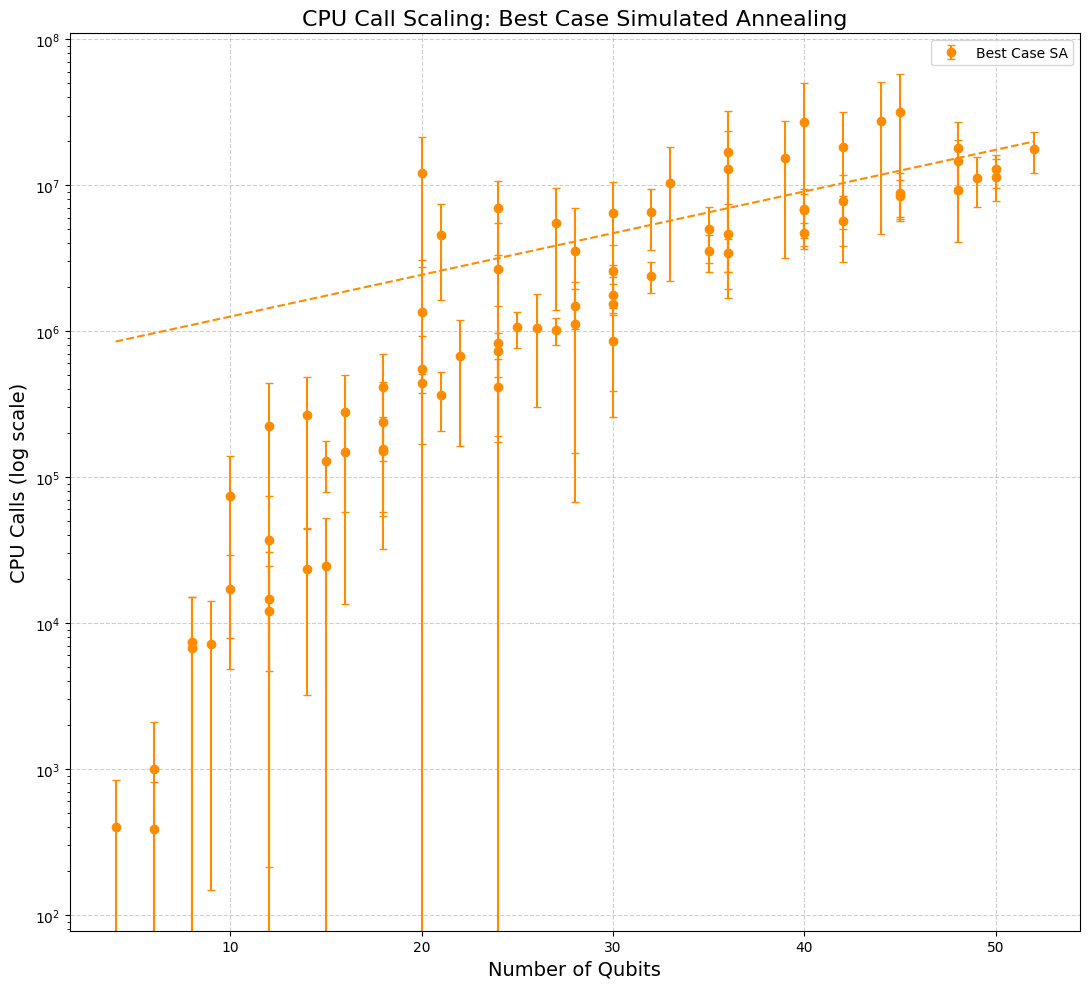

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the grouped and averaged dataset
cpu_df = pd.read_csv("combined_SA_stats_convergence.csv")

# --- Exponential fit function ---
def exp_fit(x, A, B):
    return A * np.exp(B * x)

# --- Plot ---
plt.figure(figsize=(11, 10))

x = cpu_df["num_qubits"]
y = cpu_df["cpu_calls_mean"]
yerr = cpu_df["std_cpu_calls"]

# Plot error bars
plt.errorbar(x, y, yerr=yerr, fmt="o", label="Best Case SA", capsize=3, color="darkorange")

# Remove any rows with NaN or inf in x, y, or yerr
mask = np.isfinite(x) & np.isfinite(y) & np.isfinite(yerr)
x_clean, y_clean, yerr_clean = x[mask], y[mask], yerr[mask]

# Exponential fit
popt, _ = curve_fit(exp_fit, x_clean, y_clean, p0=(y_clean.iloc[0], 0.1))
x_fit = np.linspace(x_clean.min(), x_clean.max(), 200)
plt.plot(x_fit, exp_fit(x_fit, *popt), "--", color="darkorange")
print(f"Exp Fit: A = {popt[0]:.2e}, B = {popt[1]:.3f}")

# Final touches
plt.yscale("log")
plt.xlabel("Number of Qubits", fontsize=14)
plt.ylabel("CPU Calls (log scale)", fontsize=14)
plt.title("CPU Call Scaling: Best Case Simulated Annealing", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
from proteinfolding.plotter_scaling import DataPlotter
import pandas as pd

cpu_df = pd.read_csv("complexity_SA_stats.csv")
qpu_df = pd.read_csv("QPU_calls_stats_p4.csv")
qpu_df_mps = pd.read_csv("QPU_calls_stats_mps.csv")

save_path="/Users/aag/Documents/proteinfolding/plots/xy_qaoa/cpu_vs_qpu"

plotter = DataPlotter(cpu_df, qpu_df, qpu_df_mps)
plotter.plot_scaling_linear_scale()


TypeError: DataPlotter.__init__() takes 3 positional arguments but 4 were given

SA $(\div 10^9 Hz)$ LOOCV Slope: 0.087 ± 0.003
SA $(\div 10^9 Hz)$ Exp Fit: A = 1.51e-04, B = 0.086 ± 0.007, R² = 0.8209
QAOA Statevector $(\div 10^3 Hz)$ LOOCV Slope: 0.039 ± 0.009
QAOA Statevector $(\div 10^3 Hz)$ Exp Fit: A = 1.00e-01, B = 0.039 ± 0.035, R² = 0.0279
QAOA MPS $(\div 5 x 10^4 Hz)$ LOOCV Slope: 0.038 ± 0.004
QAOA MPS $(\div 5 x 10^4 Hz)$ Exp Fit: A = 9.05e-02, B = 0.038 ± 0.014, R² = 0.6043

Crossover point between SA $(\div 10^9 Hz)$ and QAOA Statevector $(\div 10^3 Hz)$:
x = 137.29 qubits, estimated runtime ≈ 2.08e+01 seconds

Crossover point between SA and SV lower error band:
x = 50.69 qubits, estimated runtime ≈ 1.19e-02 seconds


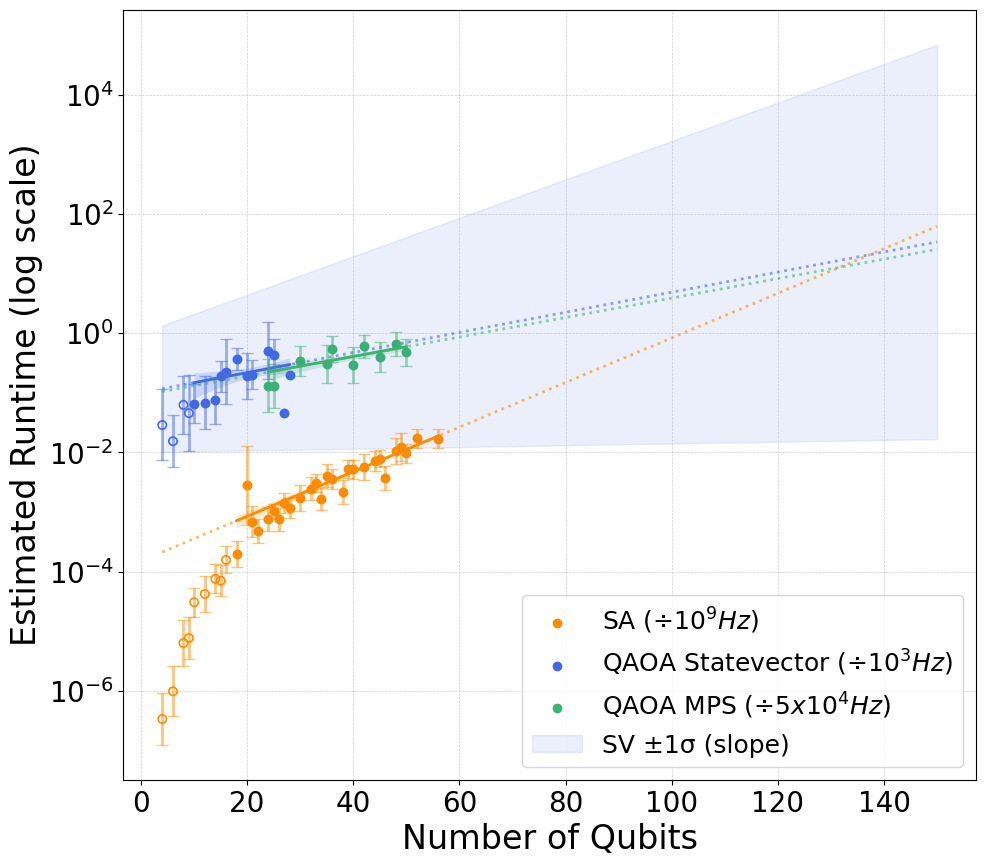

In [ ]:
plotter.plot_scaling_normalized(save_path='/Users/aag/Documents/proteinfolding/plots/xy_qaoa/cpu_vs_qpu')

CPU Exp Fit (log-fit): a=1.049e+04, b=0.158, R²=0.8288


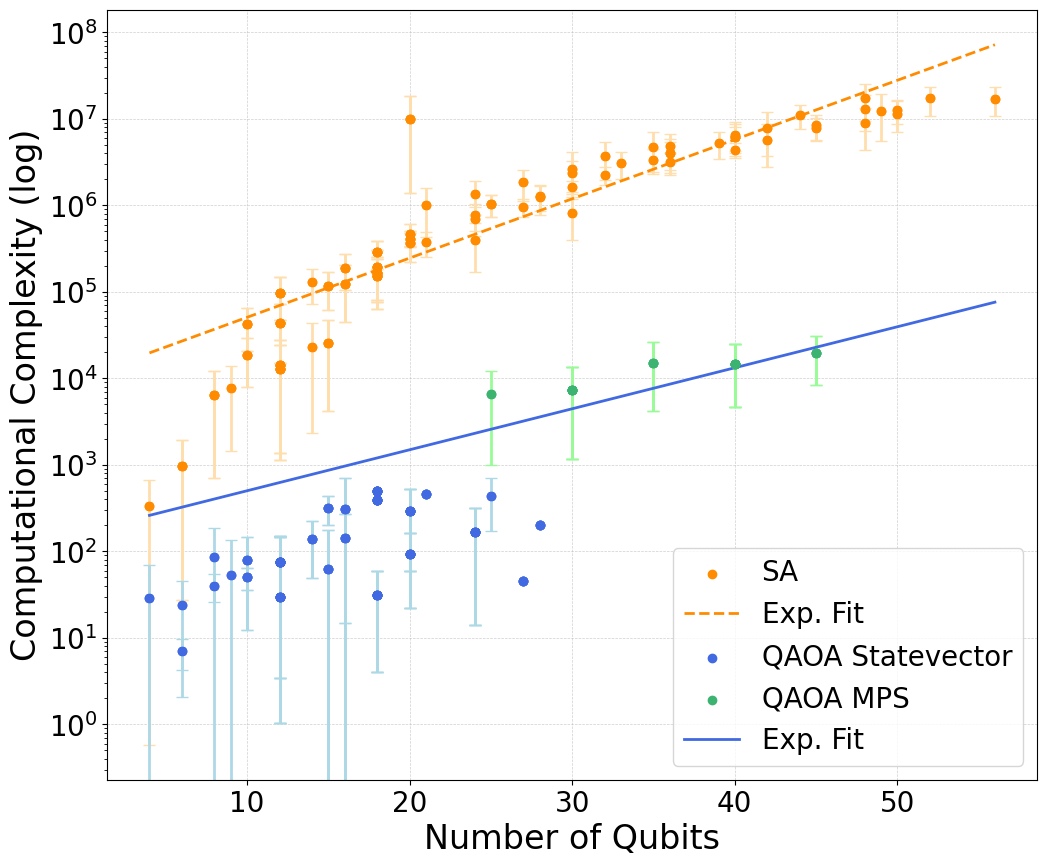

In [68]:
plotter.plot_scaling_semilog_exp_fit(save_path)

Exponential Fit: y = 7.88e+04 * exp(0.09 * x)


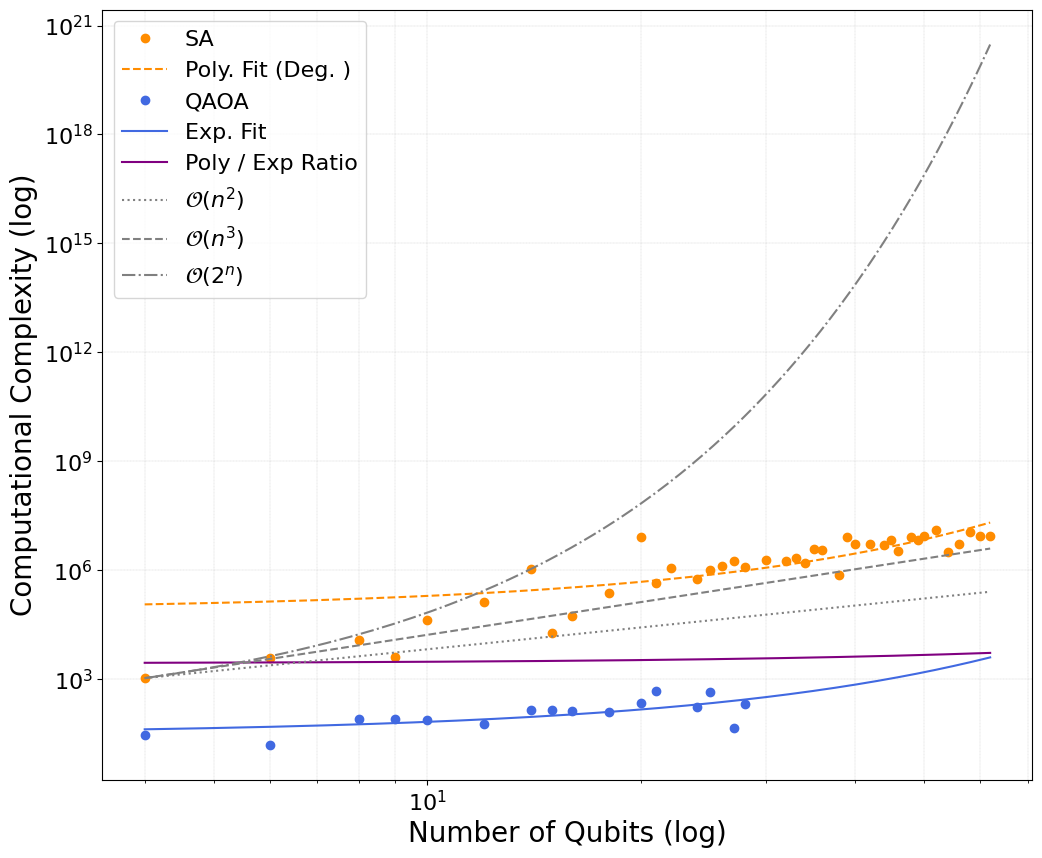

In [143]:
plotter.plot_scaling_loglog_poly_vs_exp(save_path)

/Users/aag/Documents/proteinfolding/notebooks/local_testing
Polynomial (deg=4) R² in log-log space: 1.0000


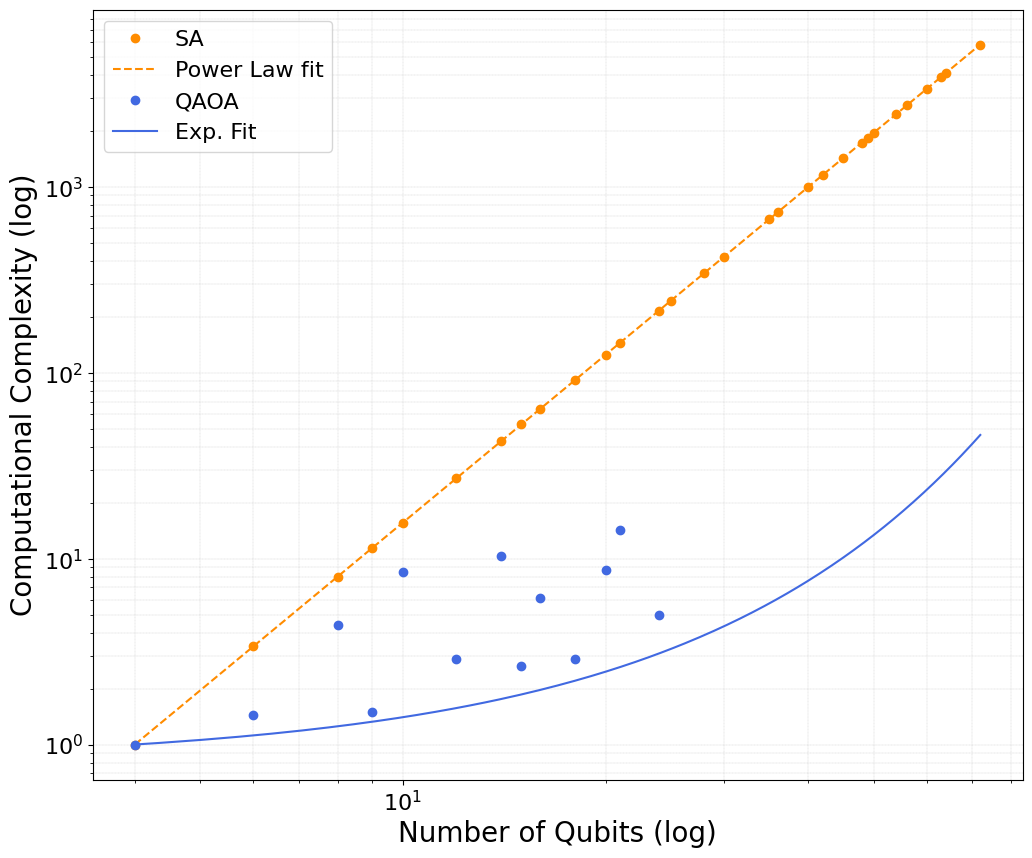

In [121]:
plotter.plot_scaling_loglog_poly_vs_exp_normalised()

Processing p=1.0: Unique num_qubits values: [ 4  6  8  9 10 12 16]
Processing p=2.0: Unique num_qubits values: [ 4  6  8  9 10 12 15 16 18]
Processing p=3.0: Unique num_qubits values: [ 6  8 10 12 20 24]
Processing p=4.0: Unique num_qubits values: [ 8 12 15 20 24]
Processing p=5.0: Unique num_qubits values: [ 8 12 16 20]
Processing p=6.0: Unique num_qubits values: [12 20 24 25]
Processing p=7.0: Unique num_qubits values: [20 25]


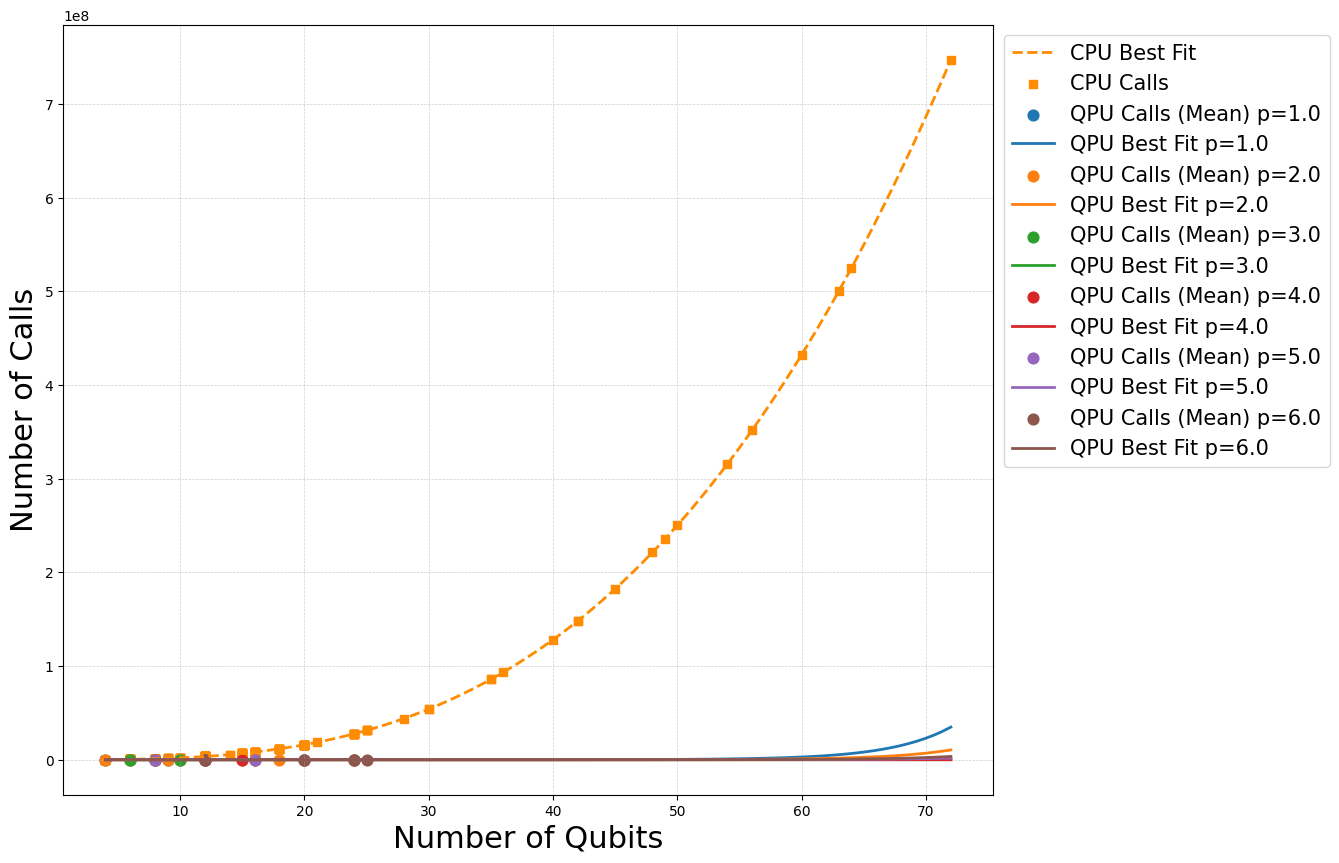

In [94]:
plotter.plot_scaling_multiple_p()

Processing p=1.0: Unique num_qubits values: [ 4  6  8  9 10 12 16]


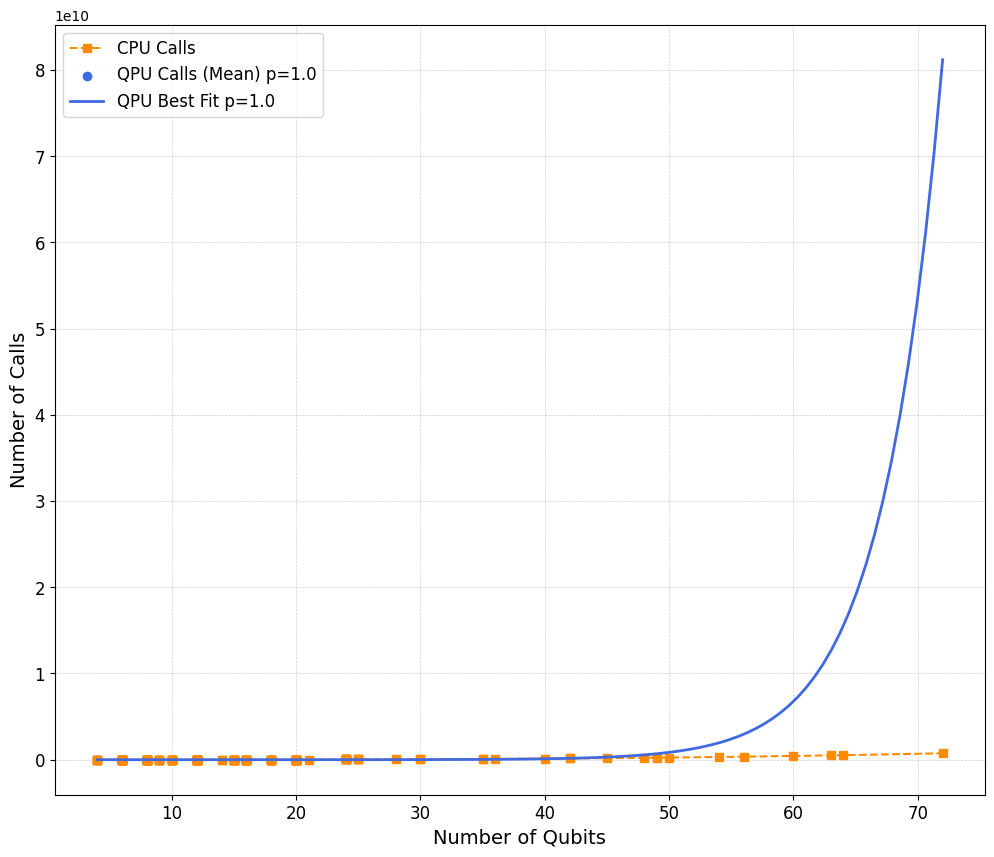

Processing p=2.0: Unique num_qubits values: [ 4  6  8  9 10 12 15 16 18]


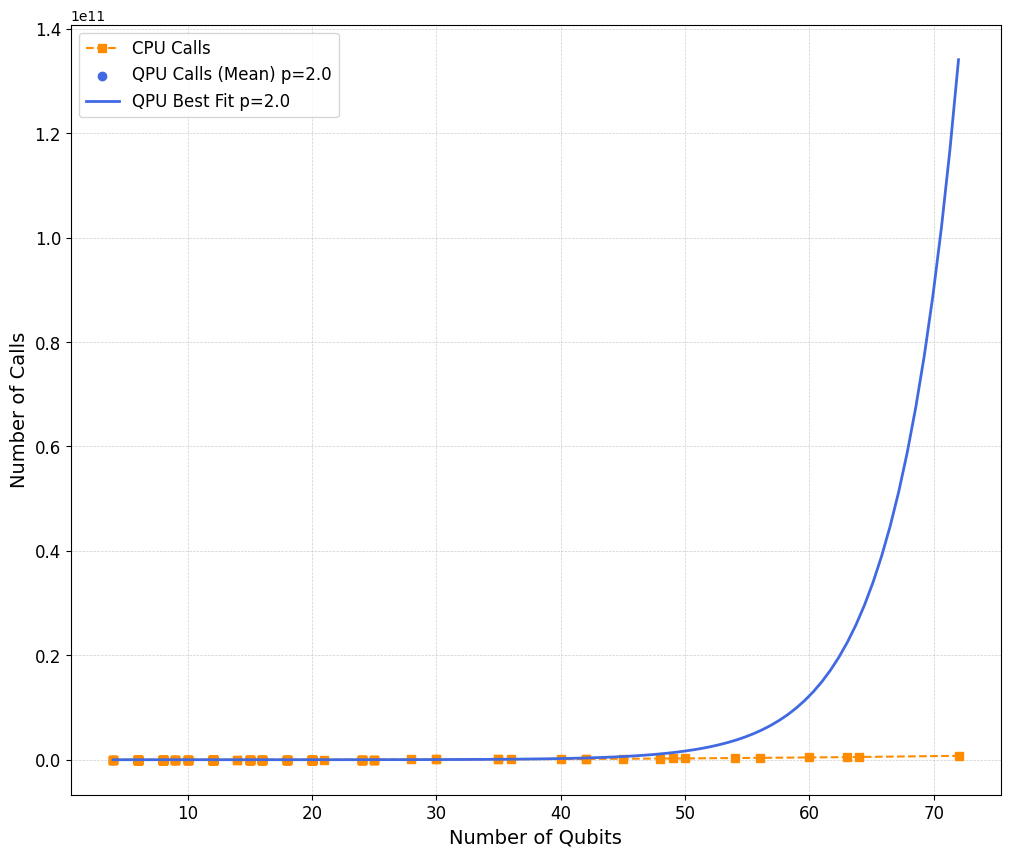

Processing p=3.0: Unique num_qubits values: [ 6  8 10 12 20 24]


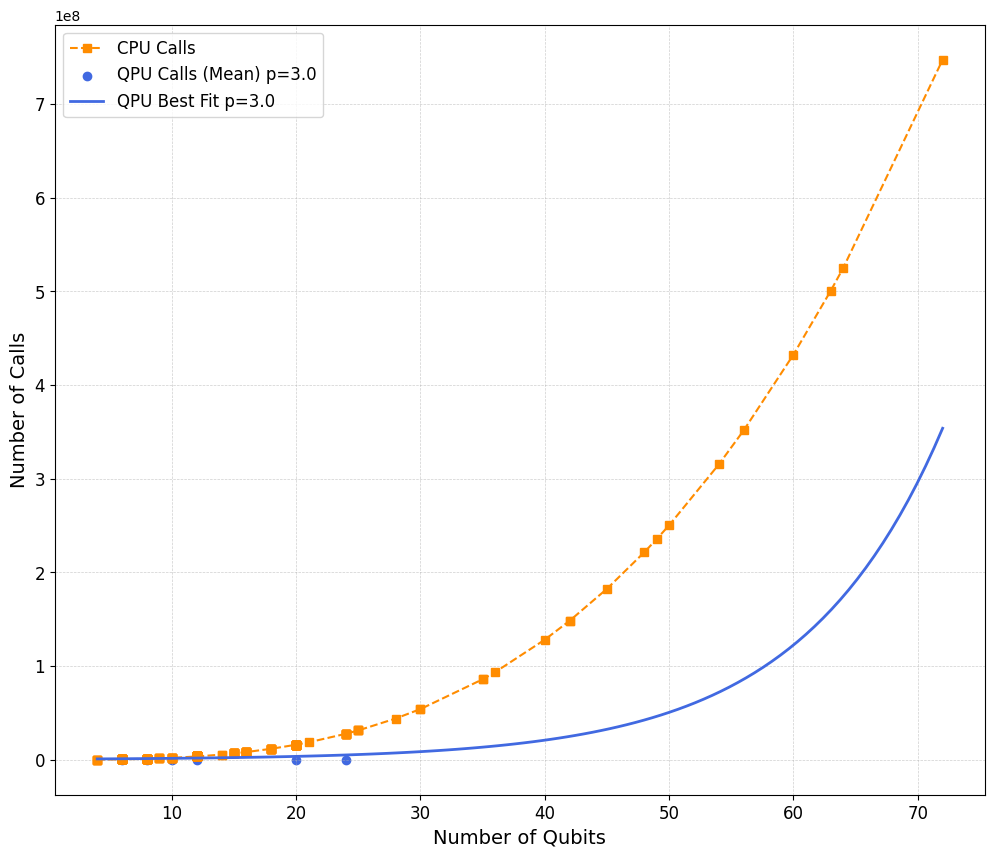

Processing p=4.0: Unique num_qubits values: [ 8 12 15 20 24]


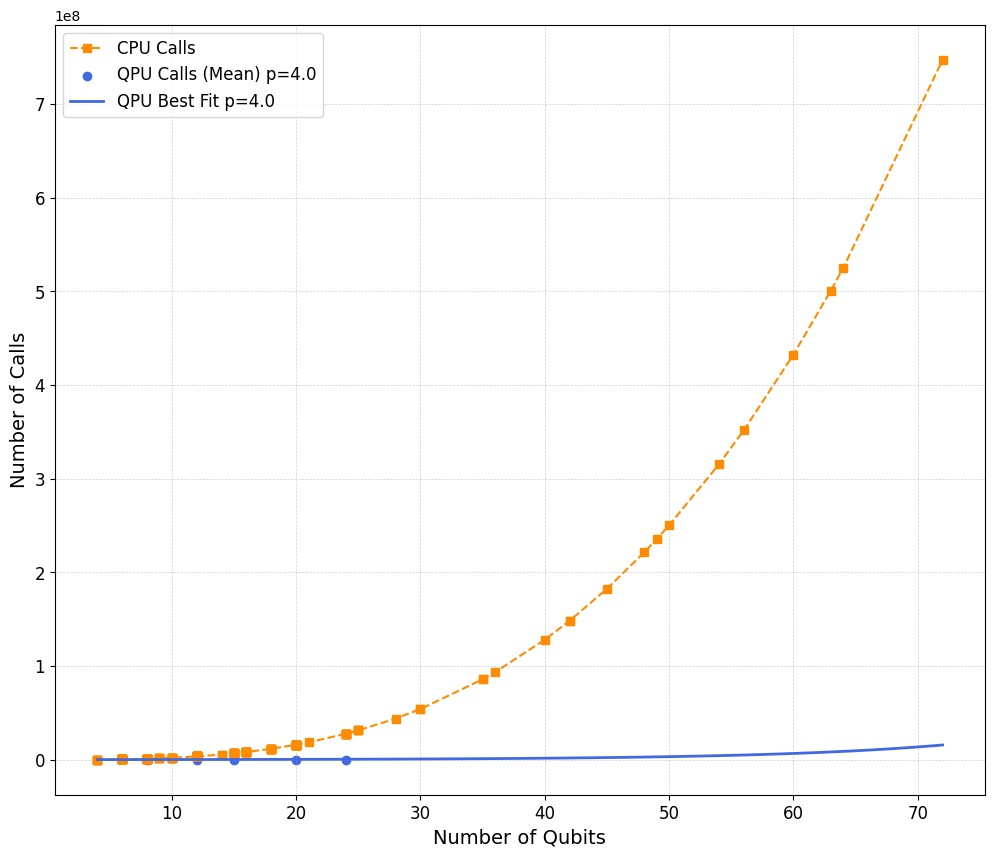

Processing p=5.0: Unique num_qubits values: [ 8 12 16 20]


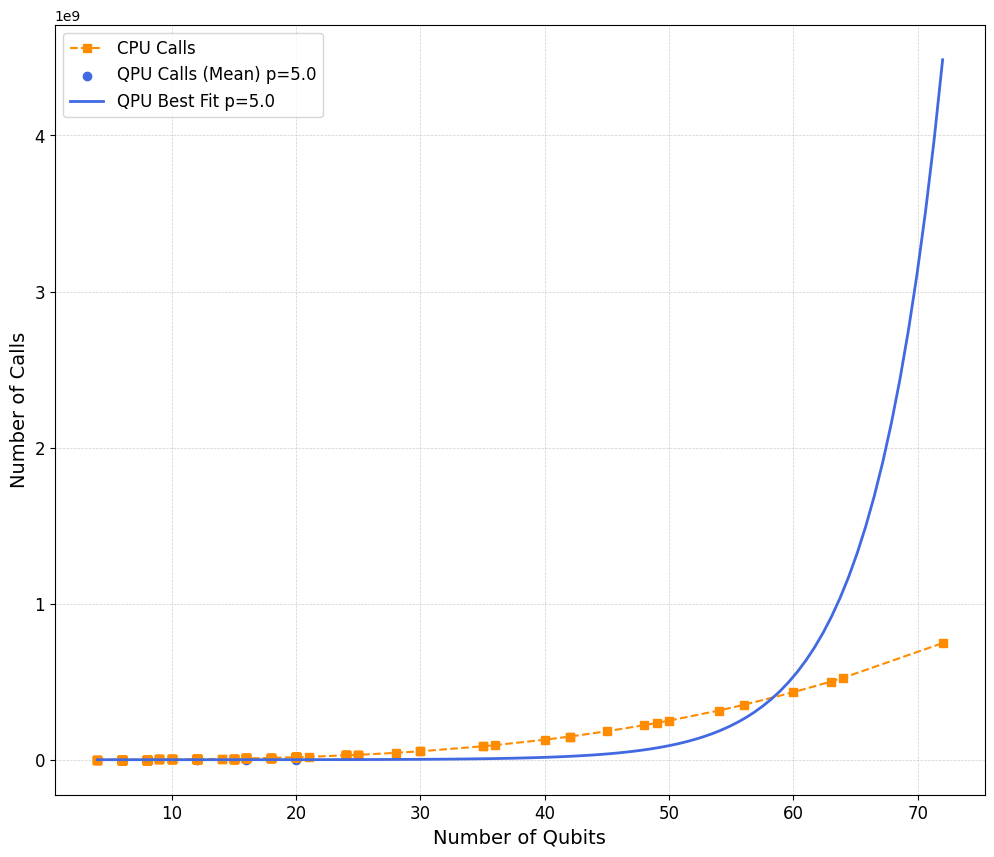

Processing p=6.0: Unique num_qubits values: [12 20 24 25]


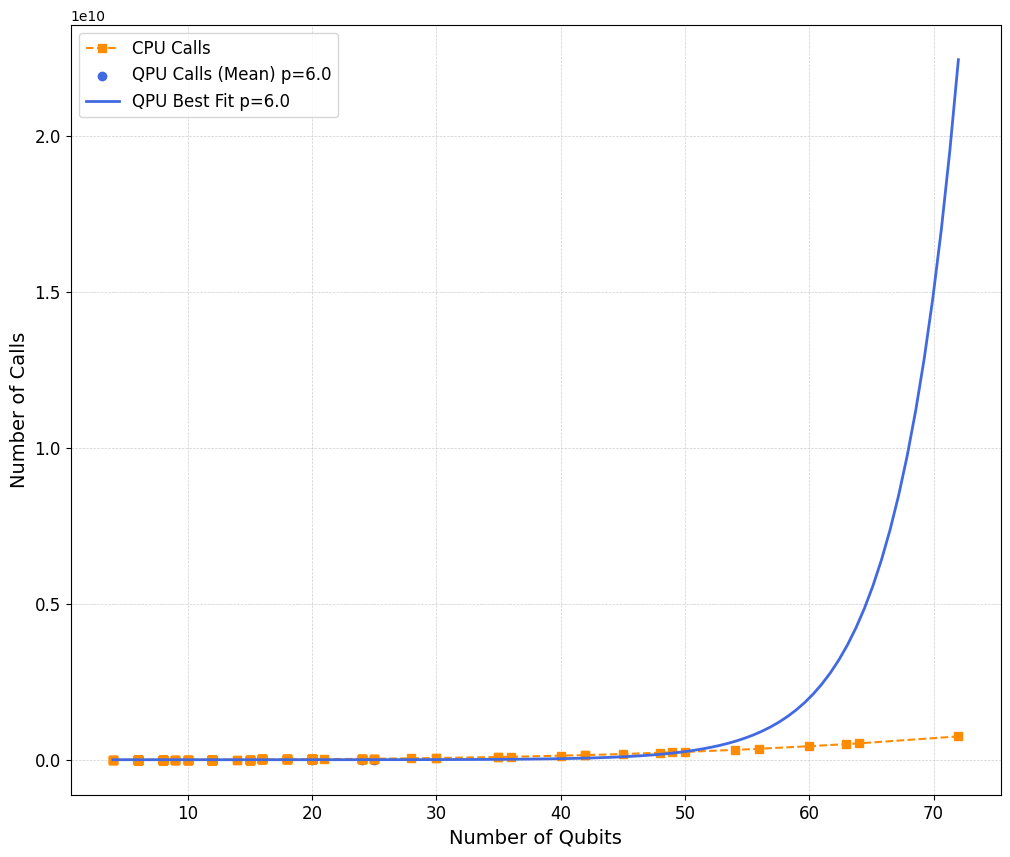

Processing p=7.0: Unique num_qubits values: [20 25]


/Users/aag/Documents/proteinfolding/proteinfolding/plotter_scaling.py:182: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_qpu, _ = curve_fit(self.exp_fit, X_qpu, y_qpu)


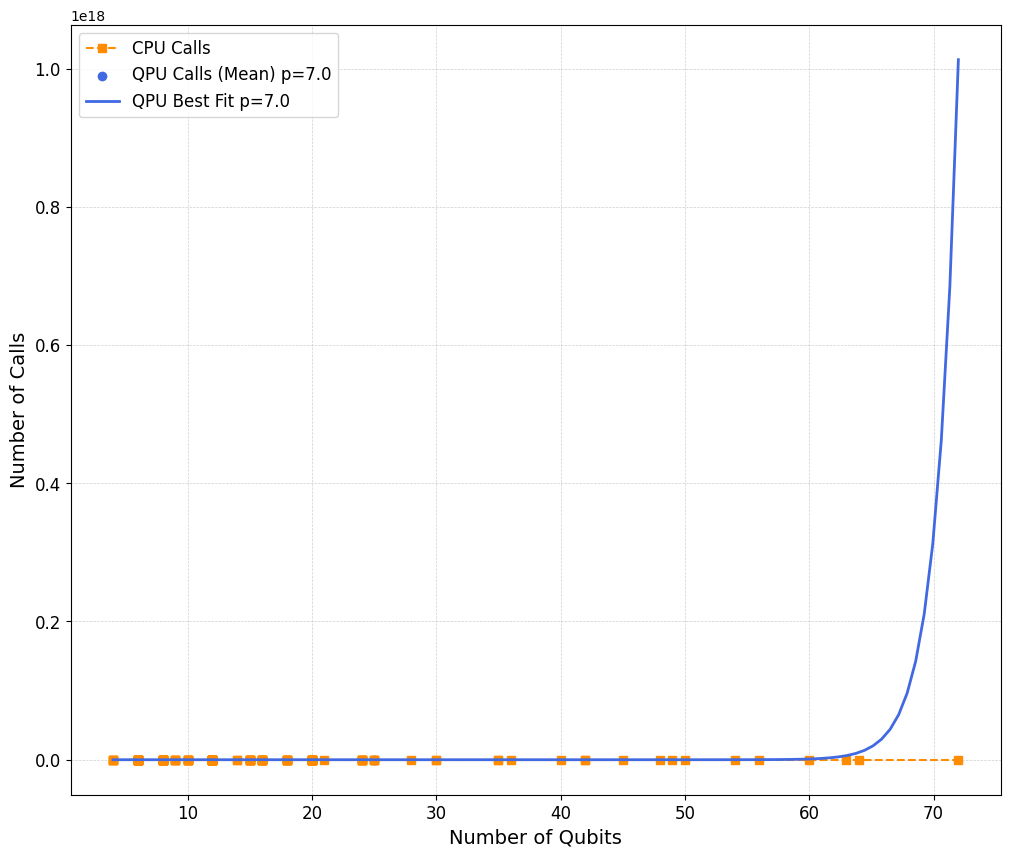

In [96]:
plotter.plot_scaling_per_p()

Processing num_rot=2, p=1.0: Unique num_qubits values: [4 6 8]
Processing num_rot=2, p=2.0: Unique num_qubits values: [4 6 8]
Processing num_rot=2, p=3.0: Unique num_qubits values: [10]
Processing num_rot=2, p=4.0: Unique num_qubits values: []
Processing num_rot=2, p=5.0: Unique num_qubits values: []
Processing num_rot=2, p=6.0: Unique num_qubits values: []
Processing num_rot=2, p=7.0: Unique num_qubits values: []


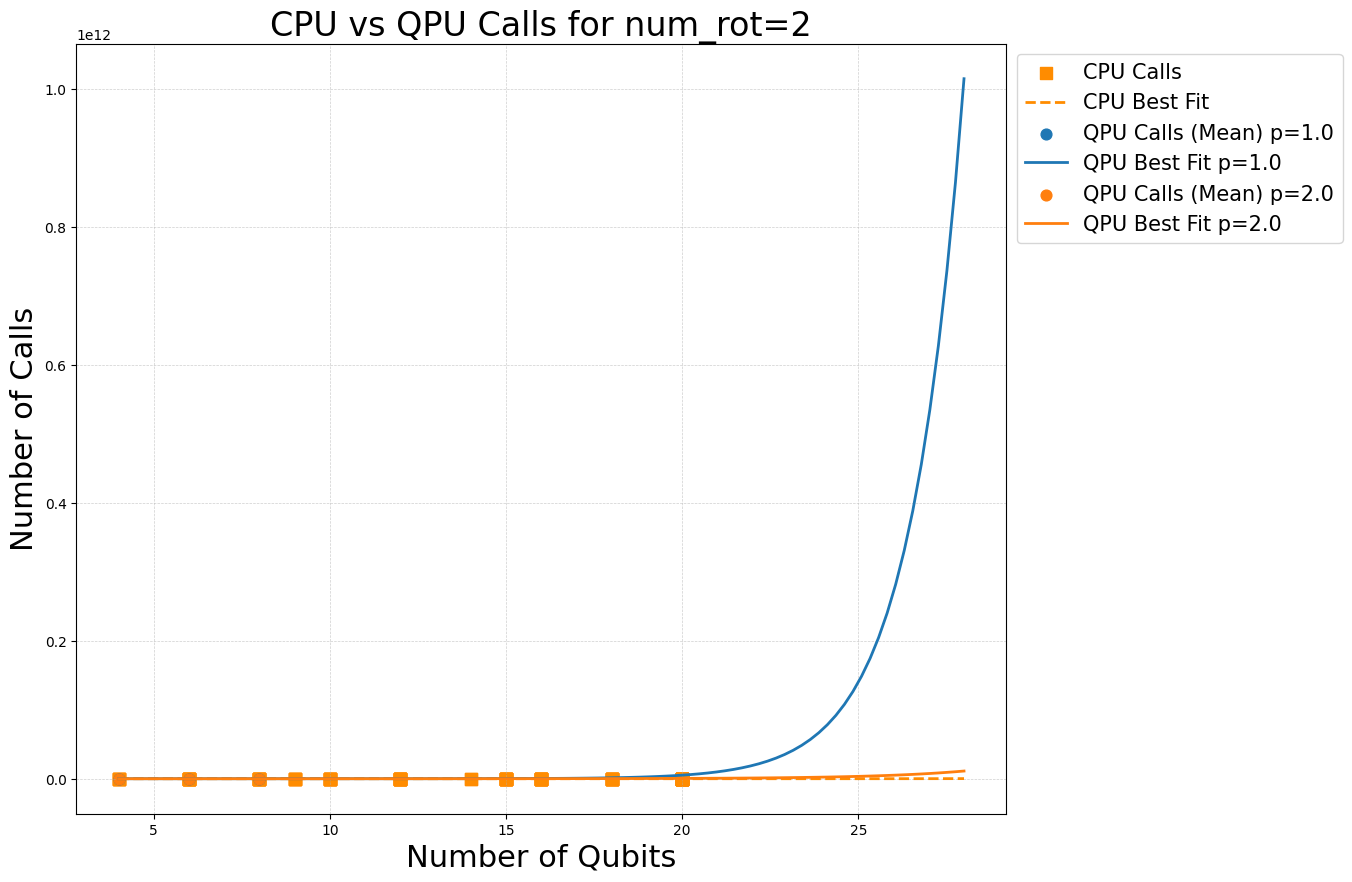

Processing num_rot=3, p=1.0: Unique num_qubits values: [ 6  9 12]
Processing num_rot=3, p=2.0: Unique num_qubits values: [ 6  9 12 15 18]
Processing num_rot=3, p=3.0: Unique num_qubits values: [12]
Processing num_rot=3, p=4.0: Unique num_qubits values: [15]
Processing num_rot=3, p=5.0: Unique num_qubits values: []
Processing num_rot=3, p=6.0: Unique num_qubits values: []
Processing num_rot=3, p=7.0: Unique num_qubits values: []


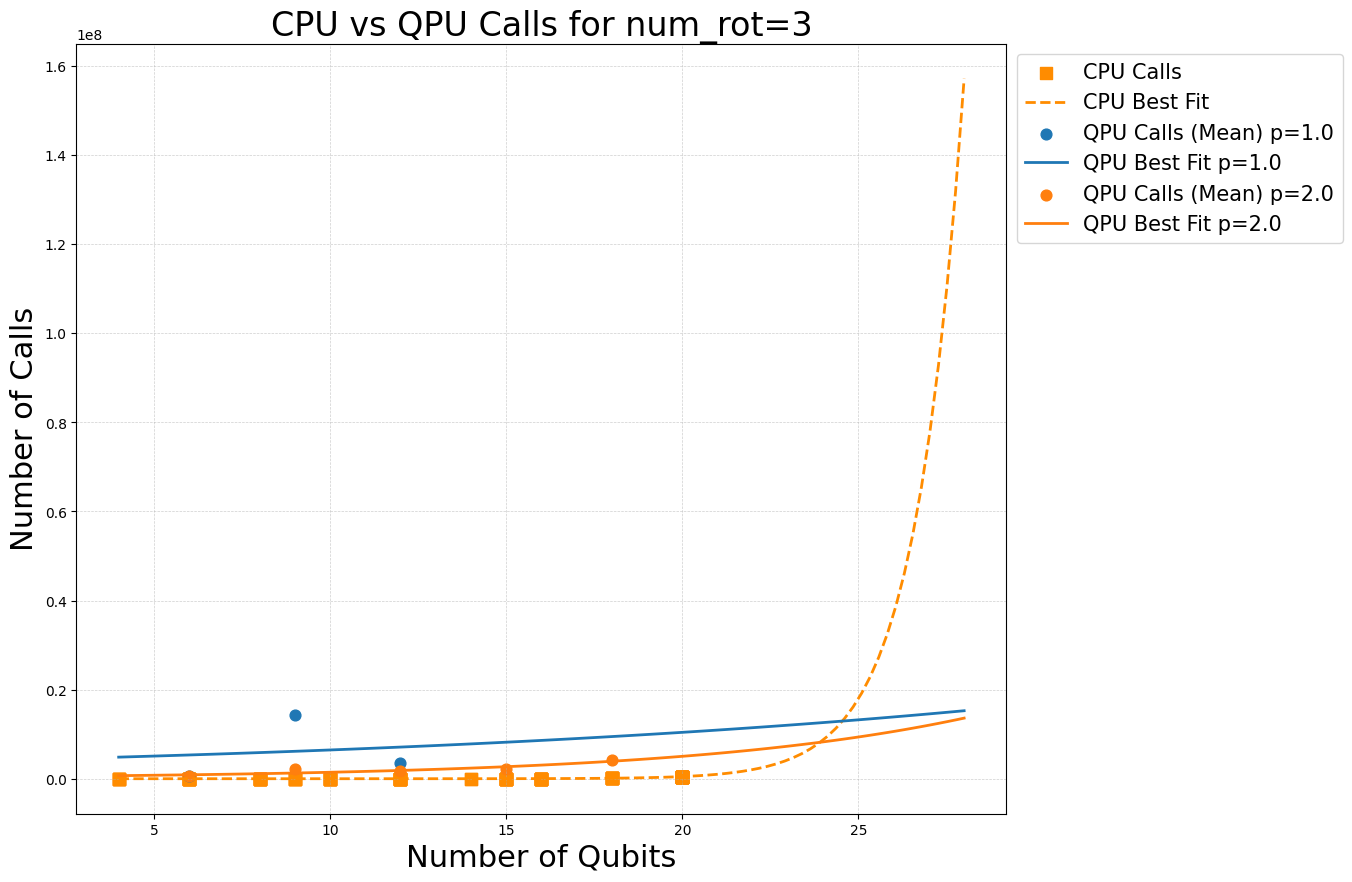

Processing num_rot=4, p=1.0: Unique num_qubits values: []
Processing num_rot=4, p=2.0: Unique num_qubits values: [16]
Processing num_rot=4, p=3.0: Unique num_qubits values: [20 24]
Processing num_rot=4, p=4.0: Unique num_qubits values: [24]
Processing num_rot=4, p=5.0: Unique num_qubits values: [16]
Processing num_rot=4, p=6.0: Unique num_qubits values: [24]
Processing num_rot=4, p=7.0: Unique num_qubits values: []


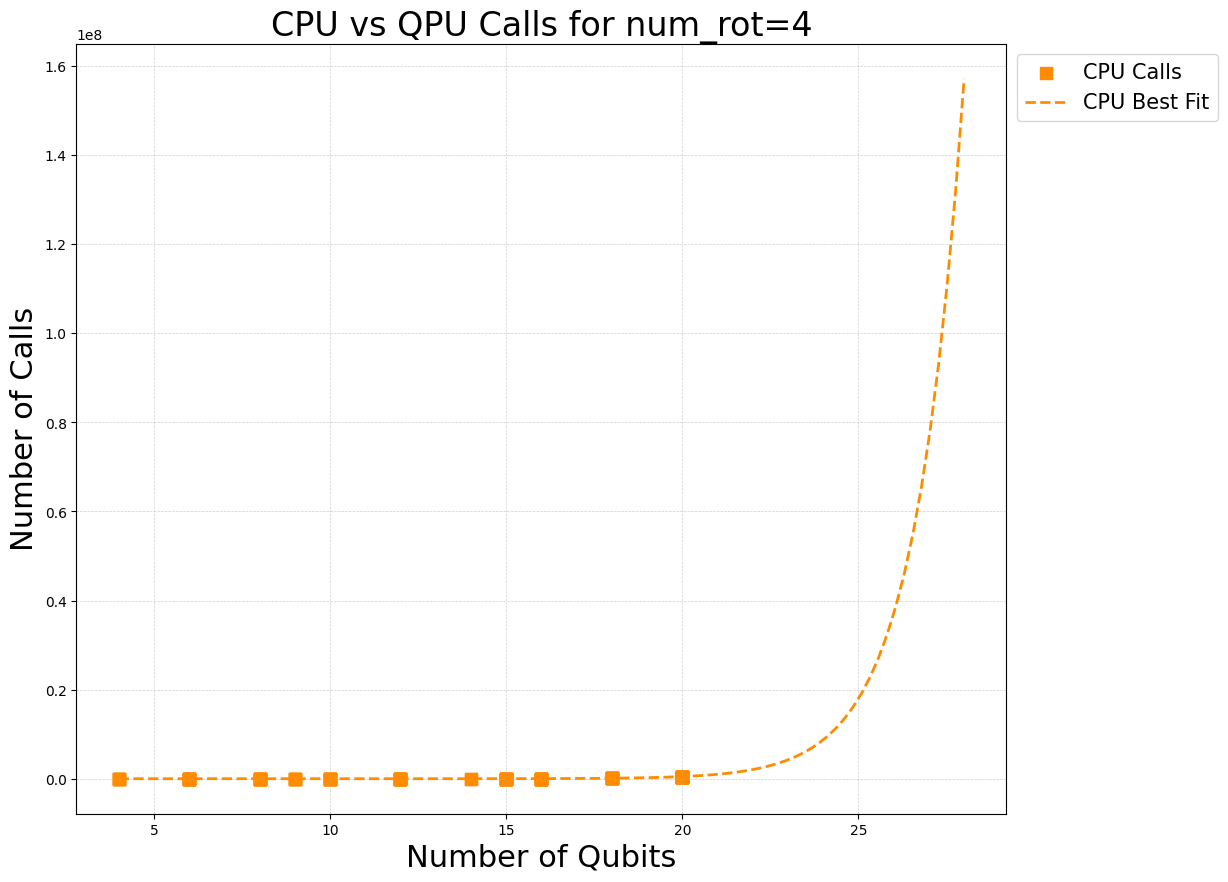

Processing num_rot=5, p=1.0: Unique num_qubits values: []
Processing num_rot=5, p=2.0: Unique num_qubits values: []
Processing num_rot=5, p=3.0: Unique num_qubits values: []
Processing num_rot=5, p=4.0: Unique num_qubits values: [20]
Processing num_rot=5, p=5.0: Unique num_qubits values: [20]
Processing num_rot=5, p=6.0: Unique num_qubits values: [25]
Processing num_rot=5, p=7.0: Unique num_qubits values: [25]


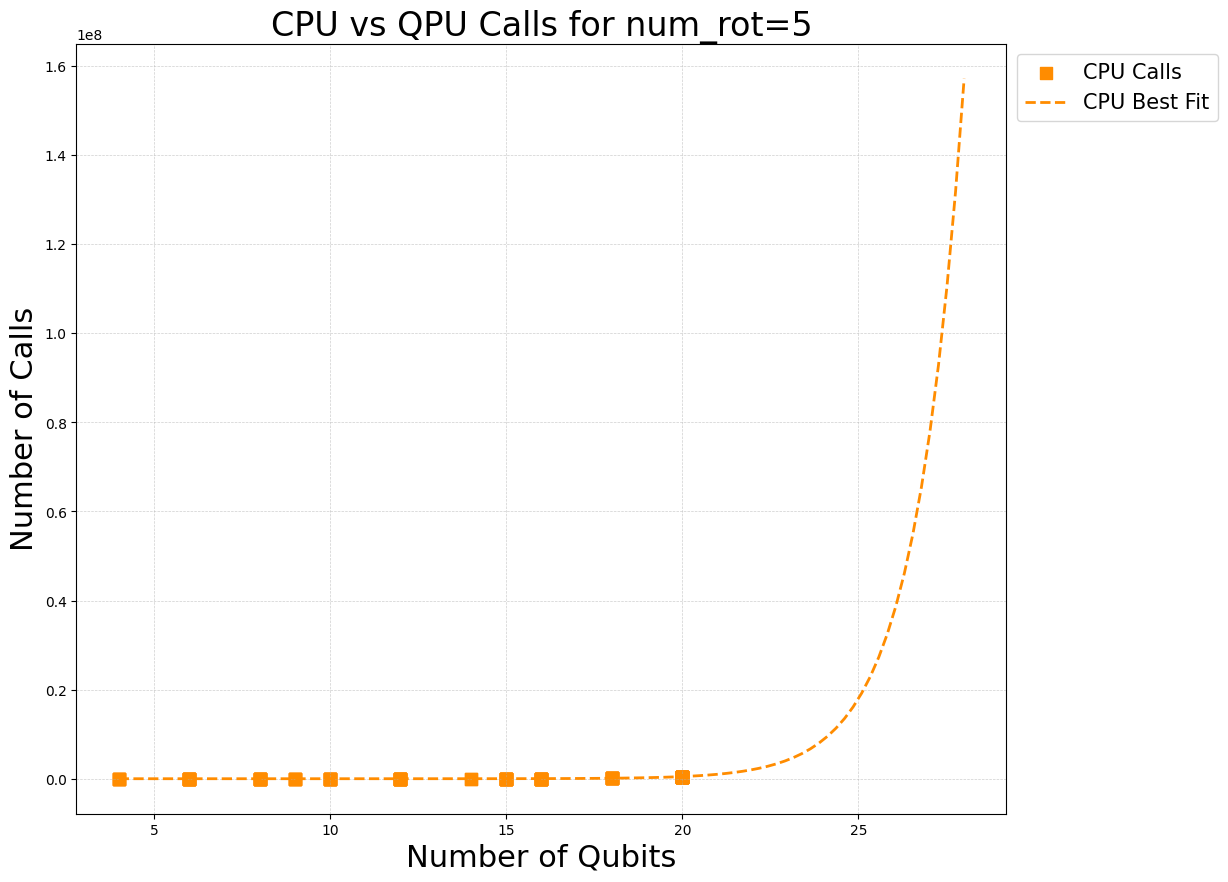

Processing num_rot=6, p=1.0: Unique num_qubits values: []
Processing num_rot=6, p=2.0: Unique num_qubits values: []
Processing num_rot=6, p=3.0: Unique num_qubits values: []
Processing num_rot=6, p=4.0: Unique num_qubits values: []
Processing num_rot=6, p=5.0: Unique num_qubits values: []
Processing num_rot=6, p=6.0: Unique num_qubits values: []
Processing num_rot=6, p=7.0: Unique num_qubits values: []


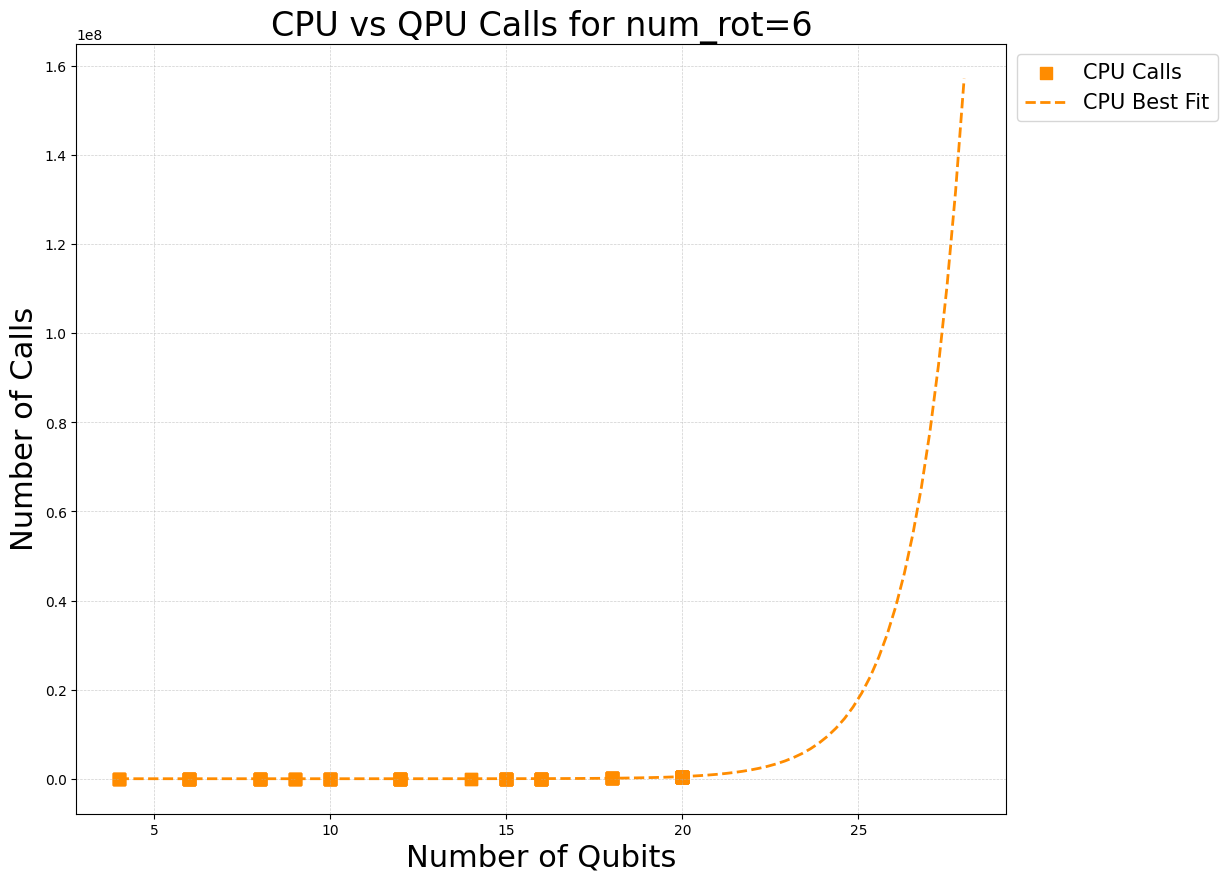

In [18]:
plotter.plot_scaling_per_num_rot_p()

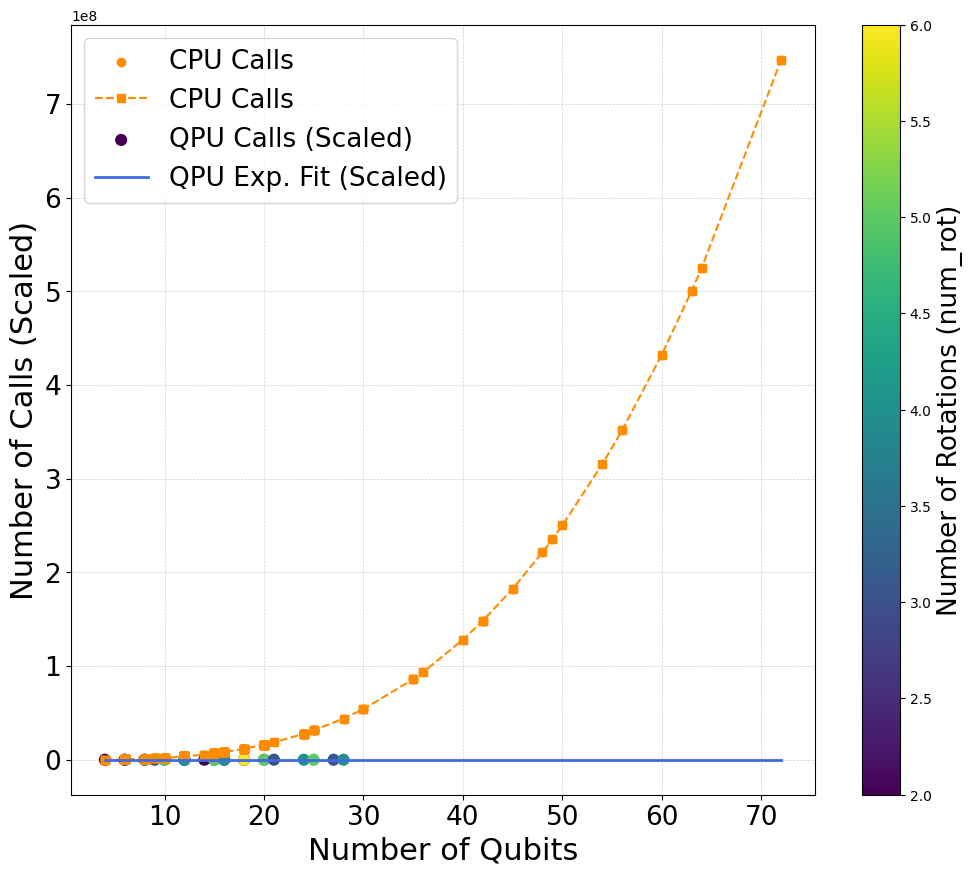

In [97]:
plotter.plot_scaling_num_rot_division()

Processing p=1.0: Unique num_qubits values: [6]


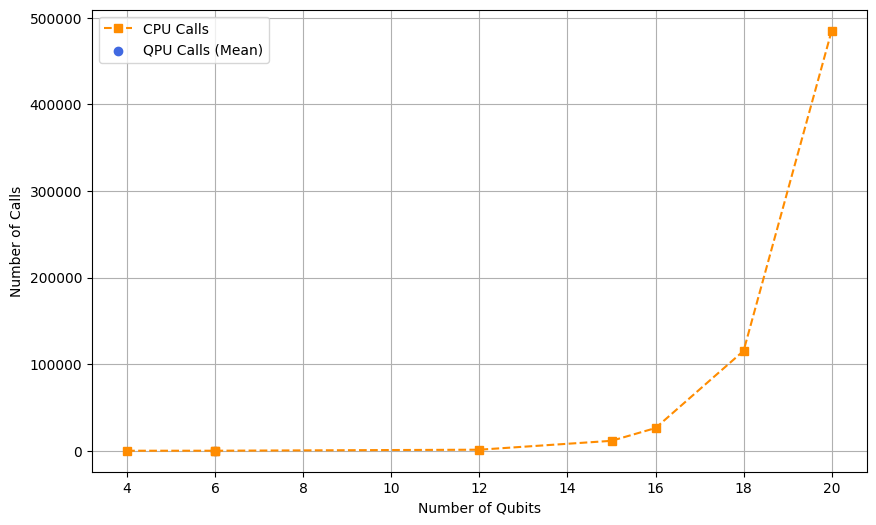

Processing p=2.0: Unique num_qubits values: [ 6 12 15 16 20]


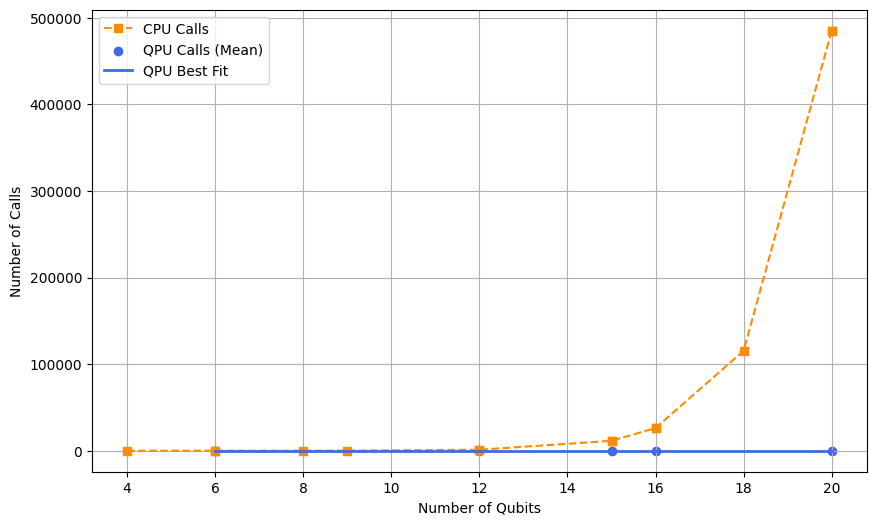

Processing p=3.0: Unique num_qubits values: [ 6 12 15 16 20]


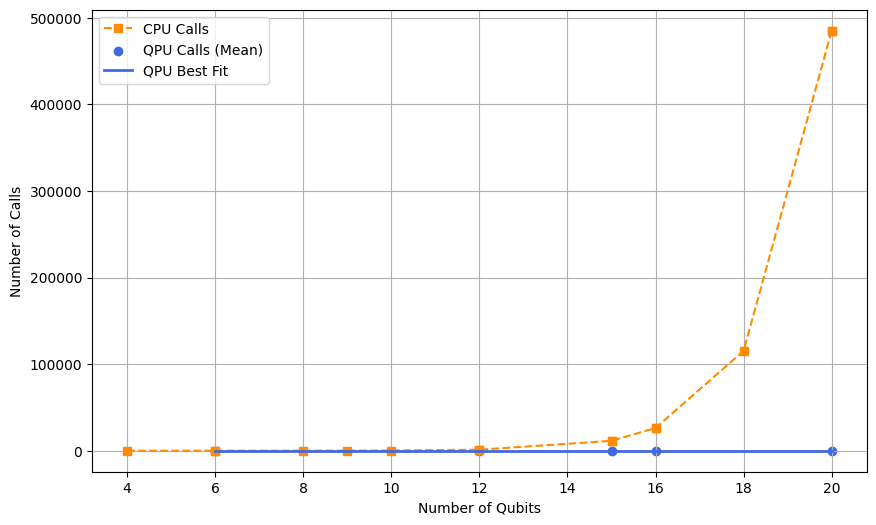

Processing p=4.0: Unique num_qubits values: [12 15 16]


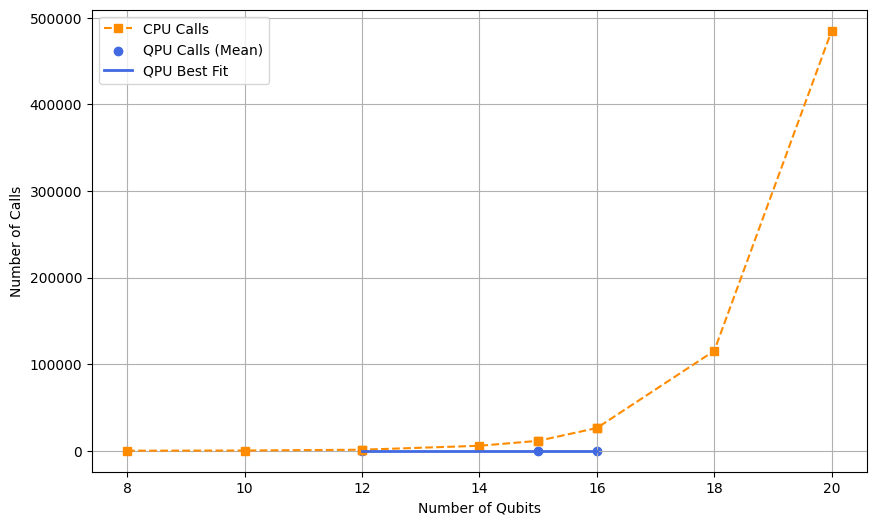

Processing p=5.0: Unique num_qubits values: [12 15 16 20]


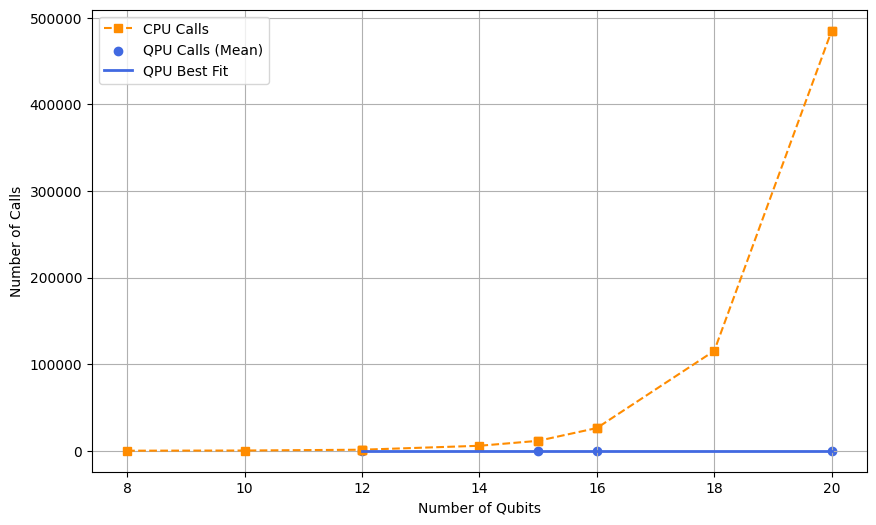

Processing p=6.0: Unique num_qubits values: [12 15 16 20]


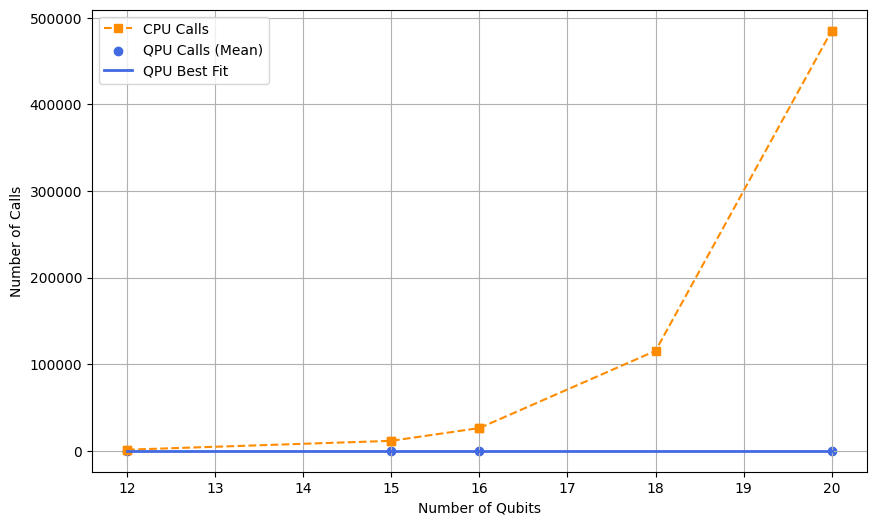

Processing p=7.0: Unique num_qubits values: [16 20]


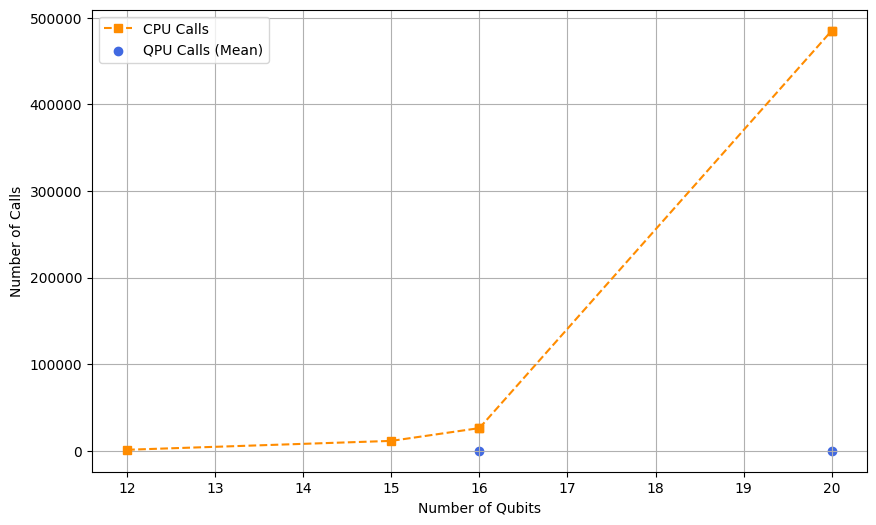

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cpu_df = pd.read_csv("complexity_SA.csv")  
qpu_df = pd.read_csv("QPU_calls_trained.csv") 

if 'p' not in qpu_df.columns:
    raise ValueError("Column 'p' not found in QPU_calls_cleaned.csv. Make sure 'p' exists in the data.")

df = pd.merge(cpu_df, qpu_df, on="num_qubits", how="outer", suffixes=('_cpu', '_qpu'))

unique_p_values = sorted(df["p"].dropna().unique())

for p in unique_p_values:
    df_p = df[df["p"] == p]

    qpu_stats = df_p.groupby("num_qubits")["qpu_calls"].agg(["mean", "std"]).reset_index()
    qpu_stats.rename(columns={"mean": "qpu_mean", "std": "qpu_std"}, inplace=True)
    qpu_stats.dropna(inplace=True)

    print(f"Processing p={p}: Unique num_qubits values:", qpu_stats["num_qubits"].values)
    
    X = df["num_qubits"].values
    y_cpu = df["cpu_calls"].values
    y_qpu = qpu_stats["qpu_mean"].values

    X_cpu = X[y_cpu > 0]
    y_cpu = y_cpu[y_cpu > 0]

    X_qpu = qpu_stats["num_qubits"].values
    y_qpu = y_qpu[y_qpu > 0]
    X = qpu_stats["num_qubits"].values
    y = qpu_stats["qpu_mean"].values

    num_qubits_smooth = np.linspace(X.min(), X.max(), 100)

    def exp_fit(x, A, B):
        return A * np.exp(B * x)

    popt_cpu, _ = curve_fit(exp_fit, X_cpu, y_cpu, p0=(1, 0.1))

    if len(X) > 2:  
        scaling_factor = 50000
        y_qpu_scaled = y_qpu * scaling_factor 
        popt_qpu, _ = curve_fit(exp_fit, X_qpu, y_qpu, p0=(1, 0.1))
        qpu_best_fit_scaled = exp_fit(num_qubits_smooth, *popt_qpu) * scaling_factor
    else:
        qpu_best_fit = np.interp(num_qubits_smooth, X, y) 

    plt.figure(figsize=(10, 6))

    plt.plot(df_p['num_qubits'], df_p['cpu_calls'], marker='s', linestyle='--', label="CPU Calls", color='darkorange')

    plt.scatter(qpu_stats["num_qubits"], qpu_stats["qpu_mean"], label="QPU Calls (Mean)", color='royalblue')

    if len(qpu_stats) > 2: 
        plt.plot(num_qubits_smooth, qpu_best_fit, linestyle="-", label="QPU Best Fit", color="royalblue", linewidth=2)

    plt.xlabel("Number of Qubits")
    plt.ylabel("Number of Calls")
    plt.legend()
    plt.grid(True)

    plot_path = os.path.join(root_dir, "plots/xy_qaoa/cpu_vs_qpu")
    os.makedirs(plot_path, exist_ok=True)
    
    plt.savefig(os.path.join(plot_path, f"cpu_vs_qpu_calls_trained_p_{p}.pdf"))
    plt.show()
    plt.close()
